<font size=5>**Ethics considerations**</font>

The data was taken from opensource, kaggle, with the dataset that was also available on the NIH website. The source was throughly checked and compared using both websites, in order to make sure that the data was the same on both sites and that the sources are credible.

The considerations that we evaluated were wthether the data set is big enough and complete, what techniques we should implement for celaning and pre-processing, choosing suitable statistical methods and what modelling methods should we implement. This also relates strongly to the decisions that we took which in turn affected our analysis, as the cleaning and filling methods, the choice of parameters in the statistical tests and grouping different data into more cohesive categories all influence the outcome of the analysis.

One limitation of our analysis is that even though we used this data to try and find patterns and relations between overdose deaths and categories of people/ of drugs, the conclusions we drew are limited to the data available and may not be applicable to broader populations or different time frames. We could forecast future numeric predictions for following years based on our model, however we never know what will happen and how it will impact areas like drug use.

Stakeholders andd people who can benefit from our analysis include hospitals, doctors, families of people who are struggling with addiction, social workers, especially people who work/ spend time with younger audiences who are relatively prone to using substances as will be seen in our analysis.

If this data conclusions will stigmatise certain categories of people (**not at all intended**), individuals or communities might be harmed, but they might just as well benefit from knowing the right facts. As for exclusions, the analysis might not fully represent all demographics equally, especially if there are gaps in the data related to certain populations. As you'll find out, in a bunch of years/ demographic categories/ etc. some entries were not filled and in order to not wrongly assume data with heavy implications, had to be dropped - maybe this in turn excludes some groups of subjects from the analysis.

<font size=5>**Research Questions**</font>

1. Which category of drugs proves to lead to the most overdoses in USA? Differentiate between age groups!

2. Did the Covid-19 pandemic increase deaths caused by drug overdose in USA?

3. Demographics: 

    3.1. Are more deaths by overdose encountered in male or female subjects?

    3.2. In which ethnicity group do we encounter the most deaths due to drug overdose?

    3.3. Which gender uses a wider variety of drug types?

<font size=5>**Importing the necessary libraries and tools**</font>


In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix
from pandas.plotting import autocorrelation_plot
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer


<font size=5>**1: Cleaning the data**</font>


We want to display each datasheet and table as a DataFrame, so that it's clearer to read and handle the missing values. 


The missing values will also be displayed and we will calculate how much percentage from the data is missing and why, and if there is a way of handling it.


In [53]:
file_path = 'Overdose1999-2021.xlsx'
sheets_dict = pd.read_excel(file_path, sheet_name=None)

# Iterate over each sheet in the file
for sheet_name, df in sheets_dict.items():
    
    print(f"{sheet_name}")
    display(df)

Rate Drug OD Deaths


,Year,1999,2000,2001,2002,2003,2004,2005,2006,2007,...,2014,2015,2016,2017,2018,2019,2020,2021,2015-2021 Fold Change,Unnamed: 25
0,Total Overdose Deaths,6.1,6.2,6.8,8.2,8.9,9.4,10.1,11.5,11.9,...,14.7,16.3,19.8,21.7,20.7,21.6,28.3,32.4,2.0,NaN
1,Female,3.9,4.1,4.6,5.8,6.4,6.9,7.3,8.2,8.8,...,11.1,11.8,13.4,14.4,13.6,13.7,17.1,19.6,1.7,NaN
2,Male,8.2,8.3,9.0,10.6,11.5,11.8,12.8,14.8,14.9,...,18.3,20.8,26.2,29.1,27.9,29.6,39.5,45.1,2.2,NaN
3,Any Opioid1,2.9,3.0,3.3,4.1,4.5,4.7,5.1,5.9,6.1,...,9.0,10.4,13.3,14.9,14.6,15.5,21.4,24.7,2.4,2015-2021 Fold Change
4,Female,1.4,1.6,1.9,2.6,2.8,3.1,3.4,3.9,4.3,...,6.3,7.1,8.5,9.4,9.0,9.3,12.3,14.5,2.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,Female,NaN,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,...,0.3,0.3,0.3,0.4,0.4,0.5,0.7,0.8,2.7,1
98,Male,NaN,0.0,0.0,0.1,0.1,0.1,0.1,0.1,0.1,...,0.2,0.2,0.3,0.5,0.4,0.5,0.8,0.8,4.0,1.2
99,Antidepressants WITHOUT Synthetic Opioids othe...,NaN,NaN,0.6,0.7,0.8,0.8,0.8,0.9,1.0,...,1.3,1.2,1.1,1.2,1.1,1.0,1.0,0.9,0.8,1.3
100,Female,NaN,0.6,0.6,0.8,0.8,0.9,0.9,1.1,1.1,...,1.4,1.4,1.4,1.4,1.3,1.2,1.1,1.1,0.8,2.7


Rate Drug OD, 15-24 Years


,Year,1999,2000,2001,2002,2003,2004,2005,2006,2007,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Fold Change 2015 to 2021
0,Total Overdose Deaths,3.2,3.7,4.2,5.1,6.0,6.6,6.9,8.1,8.2,...,8.3,8.6,9.7,12.4,12.6,10.8,11.2,16.7,17.2,1.8
1,Female,1.8,1.9,2.2,2.8,3.1,3.3,3.5,3.9,4.2,...,4.8,5.0,5.9,7.0,7.9,7.1,7.0,9.6,11.0,1.9
2,Male,4.5,5.3,6.1,7.3,8.8,9.6,10.0,12.0,12.0,...,11.7,12.1,13.3,17.5,17.1,14.3,15.2,23.5,23.3,1.8
3,Any Opioid1,1.6,1.9,2.3,2.9,3.4,3.8,4.0,4.9,5.0,...,5.7,6.2,7.0,9.3,9.5,8.4,8.7,14.1,14.6,2.1
4,Female,0.7,0.7,1.0,1.4,1.5,1.6,1.8,2.1,2.3,...,3.0,3.3,4.1,4.9,5.7,5.2,5.1,7.6,8.8,2.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,Female,NaN,NaN,NaN,NaN,0.1,0.1,0.2,0.1,0.2,...,0.2,0.2,0.2,0.2,0.2,0.2,0.3,0.3,0.4,2.0
62,Male,NaN,NaN,0.1,0.1,0.1,0.2,0.2,0.1,0.2,...,0.3,0.3,0.2,0.3,0.3,0.3,0.3,0.4,0.4,2.0
63,Antidepressants AND Synthetic Opioids other th...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.2,0.2,0.2,0.3,0.3,3.0,NaN,NaN,NaN,NaN
64,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.1,NaN,0.1,0.2,0.2,0.2,0.3,3.0


Rate Drug OD by Demographics


,Year,1999,2000,2001,2002,2003,2004,2005,2006,2007,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Fold Change 2015 to 2021
0,Total Overdose Deaths,6.1,6.2,6.8,8.2,8.9,9.4,10.1,11.5,11.9,...,13.8,14.7,16.3,19.8,21.7,20.7,21.6,28.3,32.4,2.0
1,Female,3.9,4.1,4.6,5.8,6.4,6.9,7.3,8.2,8.8,...,10.6,11.1,11.8,13.4,14.4,13.6,13.7,17.1,19.6,1.7
2,Male,8.2,8.3,9.0,10.6,11.5,11.8,12.8,14.8,14.9,...,17.0,18.3,20.8,26.2,29.1,27.9,29.6,39.5,45.1,2.2
3,White (Non-Hispanic),6.2,6.6,7.4,9.2,10.2,11.0,11.8,13.6,14.5,...,17.6,19.0,21.1,25.3,27.5,25.9,26.2,33.1,36.8,1.7
4,Female,4.3,4.5,5.3,6.8,7.5,8.3,8.8,10.0,11.0,...,13.8,14.6,15.8,17.7,19.1,18.0,17.6,21.5,23.8,1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,Black (Non-Hispanic),0.1,NaN,NaN,0.1,0.1,0.1,0.2,0.2,0.2,...,0.4,0.5,0.8,1.2,1.6,2.2,2.9,5.1,7.2,9.0
80,Asian* (Non-Hispanic),NaN,0.2,0.2,0.3,0.2,0.3,0.3,0.2,0.3,...,0.5,0.7,0.8,1.0,0.9,1.0,1.4,1.5,NaN,NaN
81,Native Hawaiian or Other Pacific Islander* (...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,7.4,6.6,9.0,11.8,NaN,NaN,NaN,NaN,NaN
82,Hispanic,0.2,0.2,0.2,0.3,0.4,0.4,0.5,0.5,0.4,...,0.9,1.0,1.4,1.5,2.0,2.5,3.1,4.7,6.4,4.6


Number Drug OD Deaths 


,Year,1999,2000,2001,2002,2003,2004,2005,2006,2007,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2015-2021 Fold Change
0,Total Overdose Deaths,16849,17415,19394,23518,25785,27424,29813,34425,36010,...,43982,47055,52404,63632,70237,67367,70630,91799,106699,2.0
1,Female,5591,5852,6736,8490,9386,10304,11089,12532,13712,...,17183,18243,19447,22074,23685,22426,22749,28071,32398,1.7
2,Male,11258,11563,12658,15028,16399,17120,18724,21893,22298,...,26799,28812,32957,41558,46552,44941,47881,63728,74301,2.3
3,Any Opioid1,8050,8407,9496,11920,12940,13756,14918,17545,18516,...,25052,28647,33091,42249,47600,46802,49860,68630,80411,2.4
4,Female,2057,2264,2767,3760,4138,4643,5161,5945,6581,...,9055,10227,11420,13751,15263,14724,15225,19970,23654,2.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,Female,61,77,79,154,139,164,159,176,203,...,348,437,463,529,692,704,887,1149,1347,2.9
99,Male,61,46,68,84,91,100,119,124,89,...,223,286,345,473,722,719,823,1238,1374,4.0
100,Antidepressants WITHOUT Synthetic Opioids othe...,1627,1675,1870,2132,2282,2494,2583,2833,3133,...,3887,4045,4086,3810,3855,3641,3465,3210,3138,0.8
101,Female,865,907,930,1164,1245,1385,1416,1643,1755,...,2325,2420,2446,2306,2420,2289,2161,1973,1996,0.8


Overdose1999-2021


,Year,1999,2000,2001,2002,2003,2004,2005,2006,2007,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Fold Change 2015 to 2021
0,Total Overdose Deaths,1240.0,1435.0,1700.0,2095.0,2491.0,2751.0,2918.0,3460.0,3550.0,...,3664.0,3798.0,4235.0,5376.0,5455.0,4633.0,4777.0,7095.0,7426.0,1.8
1,Female,346.0,369.0,438.0,560.0,632.0,683.0,733.0,820.0,883.0,...,1028.0,1075.0,1258.0,1483.0,1663.0,1481.0,1459.0,1990.0,2311.0,1.8
2,Male,894.0,1066.0,1262.0,1535.0,1859.0,2068.0,2185.0,2640.0,2667.0,...,2636.0,2723.0,2977.0,3893.0,3792.0,3152.0,3318.0,5105.0,5115.0,1.7
3,Any Opioid1,621.0,728.0,944.0,1179.0,1399.0,1596.0,1685.0,2096.0,2176.0,...,2486.0,2706.0,3082.0,4027.0,4094.0,3618.0,3725.0,5986.0,6312.0,2.0
4,Female,141.0,140.0,203.0,269.0,306.0,333.0,371.0,444.0,491.0,...,640.0,711.0,871.0,1041.0,1209.0,1091.0,1058.0,1584.0,1866.0,2.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,Female,NaN,NaN,NaN,NaN,28.0,28.0,33.0,24.0,33.0,...,40.0,49.0,49.0,40.0,51.0,52.0,55.0,53.0,83.0,1.7
62,Male,NaN,NaN,26.0,29.0,29.0,41.0,46.0,28.0,55.0,...,61.0,72.0,55.0,62.0,74.0,71.0,73.0,96.0,89.0,1.6
63,Antidepressants AND Synthetic Opioids other th...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0,...,86.0,122.0,145.0,3.8,NaN,NaN,NaN,NaN,NaN,NaN
64,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,21.0,NaN,26.0,34.0,35.0,44.0,72.0,3.4


In [54]:
def check_missing(df):
    missing_columns = [col for col in df.columns if df[col].isnull().any()]
    missingvalues_count =df.isna().sum()
    missingValues_df = pd.DataFrame(missingvalues_count.rename('Missing Values')).loc[missingvalues_count.ne(0)]
    missingValues_df['Percentage'] = missingValues_df['Missing Values'] * 100 / df.shape[0]
    return missingValues_df

In order to clean the data, we will choose to drop columns which have a percentage of missing values about the threshold of 30% (we experimented with multiple values and this one just made the most sense given our database).
The modified dataframe is later stored in a new one.

In [55]:
for sheet_name, df in sheets_dict.items():
    print(f"{sheet_name}")
    categorical_features = df.select_dtypes('object').columns
    numerical_features= df.select_dtypes('number').columns
    num_duplicates = df.duplicated().sum()
    df_dropped = check_missing(df)
    display(df_dropped.sort_values(by='Missing Values', ascending=False))

    df_train_dropped_columns = df.drop(columns=df.columns[df.isnull().mean() > 0.3])
    print("No. of columns before dropping: ", df.shape[1] )
    print("No. of columns after dropping: ", df_train_dropped_columns.shape[1] )
    print(df.shape[1]- df_train_dropped_columns.shape[1]," columns dropped")

    dropped_columns = df.columns.difference(df_train_dropped_columns.columns)
    print(dropped_columns)

Rate Drug OD Deaths


,Missing Values,Percentage
1999,35,34.313725
2000,31,30.392157
2001,23,22.549020
2002,18,17.647059
2003,16,15.686275
2004,16,15.686275
2005,16,15.686275
2007,13,12.745098
2008,13,12.745098
2009,13,12.745098


No. of columns before dropping:  26
No. of columns after dropping:  24
2  columns dropped
Index([1999, 2000], dtype='object')
Rate Drug OD, 15-24 Years


,Missing Values,Percentage
1999,26,39.393939
2000,25,37.878788
2001,22,33.333333
2002,19,28.787879
2004,19,28.787879
2003,17,25.757576
2007,17,25.757576
2005,16,24.242424
2006,16,24.242424
2008,16,24.242424


No. of columns before dropping:  25
No. of columns after dropping:  22
3  columns dropped
Index([1999, 2000, 2001], dtype='object')
Rate Drug OD by Demographics


,Missing Values,Percentage
Fold Change 2015 to 2021,23,27.380952
1999,22,26.190476
2000,20,23.809524
2001,18,21.428571
2021,18,21.428571
2002,17,20.238095
2003,17,20.238095
2005,17,20.238095
2004,16,19.047619
2006,16,19.047619


No. of columns before dropping:  25
No. of columns after dropping:  25
0  columns dropped
Index([], dtype='object')
Number Drug OD Deaths 


,Missing Values,Percentage


No. of columns before dropping:  25
No. of columns after dropping:  25
0  columns dropped
Index([], dtype='object')
Overdose1999-2021


,Missing Values,Percentage
1999,23,34.848485
2000,22,33.333333
2001,19,28.787879
2002,19,28.787879
2003,17,25.757576
2004,17,25.757576
2005,16,24.242424
2006,13,19.696970
2007,13,19.696970
2008,12,18.181818


No. of columns before dropping:  25
No. of columns after dropping:  23
2  columns dropped
Index([1999, 2000], dtype='object')


In [56]:
display(df_train_dropped_columns) # display the cleaned dataset


,Year,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Fold Change 2015 to 2021
0,Total Overdose Deaths,1700.0,2095.0,2491.0,2751.0,2918.0,3460.0,3550.0,3487.0,3377.0,...,3664.0,3798.0,4235.0,5376.0,5455.0,4633.0,4777.0,7095.0,7426.0,1.8
1,Female,438.0,560.0,632.0,683.0,733.0,820.0,883.0,848.0,862.0,...,1028.0,1075.0,1258.0,1483.0,1663.0,1481.0,1459.0,1990.0,2311.0,1.8
2,Male,1262.0,1535.0,1859.0,2068.0,2185.0,2640.0,2667.0,2639.0,2515.0,...,2636.0,2723.0,2977.0,3893.0,3792.0,3152.0,3318.0,5105.0,5115.0,1.7
3,Any Opioid1,944.0,1179.0,1399.0,1596.0,1685.0,2096.0,2176.0,2294.0,2229.0,...,2486.0,2706.0,3082.0,4027.0,4094.0,3618.0,3725.0,5986.0,6312.0,2.0
4,Female,203.0,269.0,306.0,333.0,371.0,444.0,491.0,482.0,521.0,...,640.0,711.0,871.0,1041.0,1209.0,1091.0,1058.0,1584.0,1866.0,2.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,Female,NaN,NaN,28.0,28.0,33.0,24.0,33.0,37.0,41.0,...,40.0,49.0,49.0,40.0,51.0,52.0,55.0,53.0,83.0,1.7
62,Male,26.0,29.0,29.0,41.0,46.0,28.0,55.0,57.0,62.0,...,61.0,72.0,55.0,62.0,74.0,71.0,73.0,96.0,89.0,1.6
63,Antidepressants AND Synthetic Opioids other th...,NaN,NaN,NaN,NaN,NaN,NaN,23.0,30.0,38.0,...,86.0,122.0,145.0,3.8,NaN,NaN,NaN,NaN,NaN,NaN
64,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,21.0,NaN,26.0,34.0,35.0,44.0,72.0,3.4


We then made a copy of the dataframe wth the droped columns in order not to mess up the other data. 
Our data's current format is a table with the category of drugs that led to death and then the number of deaths for both female and male separately. Thus we move by row and stay on the same column. We move three steps per column, because of how the table is built and we check the following cases in order to see if the missing data can be filled: 

**Case 1**

   We have null values for number female, but number of total death for the respective drug is filled, and the number of males deaths is also filled 
   
**Solution** : #female deaths = #total drug overdose death - # males death

**Case 2**

   We have null values for number male, but number of total death for the respective drug is filled, and the number of females deaths is also filled 

**Solution** : #male deaths = #total drug overdose death - # females death

**Case 3**

   We have null values for number total overdose death for respective drug, but number of female death for the respective drug is filled, and the number of males deaths is also filled 

**Solution** : #total drug overdose deaths = #females death + # males death

Thus, if we are in one of this cases we can fill the missing values from the data

In [57]:

df1=df_train_dropped_columns.copy()


for i in range(1, 22):
        for j in range (0,66,3):
                if str(df_train_dropped_columns.iloc[j,i])!= "nan": # category is not null
                        if str(df_train_dropped_columns.iloc[j+1,i])!= "nan": # female is not null
                                if str(df_train_dropped_columns.iloc[j+2,i])=="nan":     #male is null 
                                        if (df_train_dropped_columns.iloc[j,i]-df_train_dropped_columns.iloc[j+1,i])>=0:
                                             df1.iloc[j+2,i] = df_train_dropped_columns.iloc[j,i]-df_train_dropped_columns.iloc[j+1,i]
                                        else: 
                                             df1.iloc[j+2,i]="NaN"
                        else:
                                if str(df_train_dropped_columns.iloc[j+1,i]) == "nan": # female is null but the category is not 
                                      if str(df_train_dropped_columns.iloc[j+2,i])!="nan":
                                        if (df_train_dropped_columns.iloc[j,i]-df_train_dropped_columns.iloc[j+2,i])>=0:
                                            df1.iloc[j+1,i] = df_train_dropped_columns.iloc[j,i]-df_train_dropped_columns.iloc[j+2,i]
                                        else :
                                              df1.iloc[j+1,i]="NaN"   
                else : #category is null
                         if str(df_train_dropped_columns.iloc[j+1,i])!= "nan": # female is not null
                                if str(df_train_dropped_columns.iloc[j+2,i])!="nan":# man is not null
                                        if (df_train_dropped_columns.iloc[j+1,i]+ df_train_dropped_columns.iloc[j+2,i] )>=0:
                                          df1.iloc[j,i] = df_train_dropped_columns.iloc[j+1,i]+ df_train_dropped_columns.iloc[j+2,i] #fill with the sum
                                        else :
                                           df1.iloc[j,i]="NaN"

                                           
display(df1)

,Year,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Fold Change 2015 to 2021
0,Total Overdose Deaths,1700.0,2095.0,2491.0,2751.0,2918.0,3460.0,3550.0,3487.0,3377.0,...,3664.0,3798.0,4235.0,5376.0,5455.0,4633.0,4777.0,7095.0,7426.0,1.8
1,Female,438.0,560.0,632.0,683.0,733.0,820.0,883.0,848.0,862.0,...,1028.0,1075.0,1258.0,1483.0,1663.0,1481.0,1459.0,1990.0,2311.0,1.8
2,Male,1262.0,1535.0,1859.0,2068.0,2185.0,2640.0,2667.0,2639.0,2515.0,...,2636.0,2723.0,2977.0,3893.0,3792.0,3152.0,3318.0,5105.0,5115.0,1.7
3,Any Opioid1,944.0,1179.0,1399.0,1596.0,1685.0,2096.0,2176.0,2294.0,2229.0,...,2486.0,2706.0,3082.0,4027.0,4094.0,3618.0,3725.0,5986.0,6312.0,2.0
4,Female,203.0,269.0,306.0,333.0,371.0,444.0,491.0,482.0,521.0,...,640.0,711.0,871.0,1041.0,1209.0,1091.0,1058.0,1584.0,1866.0,2.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,Female,12.0,15.0,28.0,28.0,33.0,24.0,33.0,37.0,41.0,...,40.0,49.0,49.0,40.0,51.0,52.0,55.0,53.0,83.0,1.7
62,Male,26.0,29.0,29.0,41.0,46.0,28.0,55.0,57.0,62.0,...,61.0,72.0,55.0,62.0,74.0,71.0,73.0,96.0,89.0,1.6
63,Antidepressants AND Synthetic Opioids other th...,NaN,NaN,NaN,NaN,NaN,NaN,23.0,30.0,38.0,...,86.0,122.0,145.0,3.8,71.0,81.0,86.0,122.0,145.0,NaN
64,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,21.0,NaN,26.0,34.0,35.0,44.0,72.0,3.4


In [58]:
# Verifying if there's still any data missing on the first row
ok=1
for i in range (0,23):
    if str(df_train_dropped_columns.iloc[1,i])!= "nan":
        pass
    else:
        ok=0
        break

if (ok==1):
    print("No data missing in total overdosed deaths")
else:
    print("Data missing in total overdose deaths column")

No data missing in total overdosed deaths


Moving on, by analysing the data we can see that sometimes the number of total deaths caused by a specific drug is smaller than either females death or males deaths, which is obviously a violation of natural dependencies (as seen in class).

Hence, even if we have two of the three cells of data filled, we still cannot fill the last. 

In [59]:
count=0
list1=[]
for i in range(1, 22):
        for j in range (0,66,3):
                if str(df1.iloc[j,i])!= "nan": # category is not null
                        if str(df1.iloc[j+1,i])!= "nan" or str(df1.iloc[j+2,i])!="nan":     
                                        if (float(df1.iloc[j+1,i])>float(df1.iloc[j,i])) or (float(df1.iloc[j+2,i])>float(df1.iloc[j,i])):
                                            count=count+1
                                            list1.append(df1.iloc[j,0])
                                            #print(df1.iloc[j,0])
result = [] 
count_dup=0
for i in list1: 
        if i not in result: 
                result.append(i); 
                      
if len(result)>=0:
        print("We have ",len(result),
              " categories where total number of deaths which are either smaller than female deaths or male deaths")
        print()
        for i in range(len(result)):          
                print(result[i])
else:
        print("Everything is alright")


We have  7  categories where total number of deaths which are either smaller than female deaths or male deaths

 Stimulants AND Synthetic Opioids other than Methadone
Cocaine AND Synthetic Opioids other than Methadone (primarily fentanyl) 
Psychostimulants With Abuse Potential AND Synthetic Opioids other than Methadone (primarily fentanyl) 
Heroin AND Synthetic Opioids other than Methadone (primarily fentanyl) 
Antidepressants AND Synthetic Opioids other than Methadone (primarily fentanyl) 
Prescription Opioids AND Synthetic Opioids other than Methadone (primarily fentanyl) 
Benzodiazepines AND Synthetic Opioids other than Methadone (primarily fentanyl) 


Above we can see that we have 7 categories of drugs and their names, for which in one of the years we have a smaller value for the total number of deaths than the number of female/ male deaths. This may be a typo in the data. 

<font size=5>**2: Data Analysis**</font> 

<font size=4>**2.1.: Time Series Analysis**</font>


First, we will only use the data row of Total Overdose Deaths across all years listed in our dataset and store it in our new data frame, namely df_covid.
Then, we will filter the data based on the year - the two categories will be before 2020 and after it, since this is the time when the pandemic hit in USA. We achieve this by first creating an auxiliary data frame and converting the entries in the Year column to numeric format; then we check if the entry is smaller or bigger than 2020 using logical statements.
Since we are conducting a time-series analysis, we transpose our dataframe to use the columns as sequential data points. 
For plotting, we create two subplots: ACF which measures the correlation between the observations separated by k lags and PACF which measures how the correlation from observations at two time points, adjusted for the correlations at all shorter lags.

This allows us to then interpret these graphs and deduct the values of p, d and q.

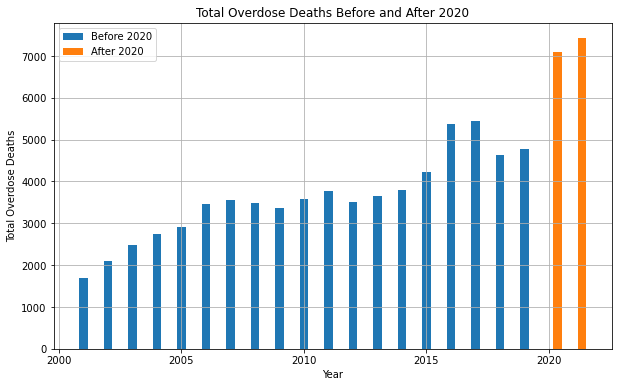

In [60]:
data = {
    'Year': list(range(2001, 2022)),
    'Total Overdose Deaths': [1700.0, 2095.0, 2491.0, 2751.0, 2918.0, 3460.0, 3550.0, 3487.0, 3377.0, 3571.0,
                               3762.0, 3518.0, 3664.0, 3798.0, 4235.0, 5376.0, 5455.0, 4633.0, 4777.0, 7095.0, 7426.0]
}

df_covid = pd.DataFrame(data)
df_covid_aux = df_covid.copy()
df_covid_aux['Year'] = pd.to_numeric(df_covid_aux['Year'], errors='coerce')

# filter data for years before and after 2020
before_2020 = df_covid_aux[df_covid_aux['Year'] < 2020]
after_2020 = df_covid_aux[df_covid_aux['Year'] >= 2020]

fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
ax.bar(before_2020['Year'], before_2020['Total Overdose Deaths'], width=bar_width, label='Before 2020')
ax.bar(after_2020['Year'] + bar_width, after_2020['Total Overdose Deaths'], width=bar_width, label='After 2020')
ax.set_xlabel('Year')
ax.set_ylabel('Total Overdose Deaths')
ax.set_title('Total Overdose Deaths Before and After 2020')
ax.legend()
ax.grid(True)

plt.show()

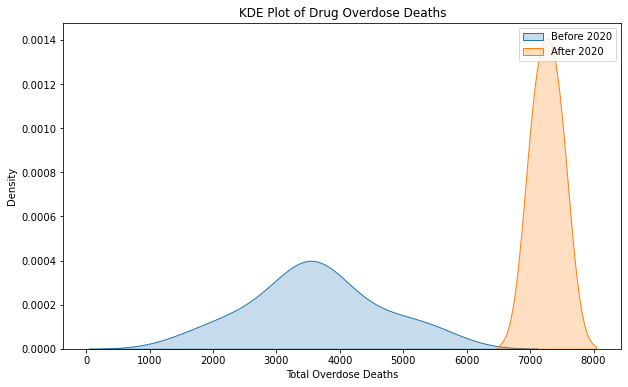

In [61]:
plt.figure(figsize=(10, 6))

sns.kdeplot(df_covid[df_covid['Year'] < 2020]['Total Overdose Deaths'], shade=True, label='Before 2020')
sns.kdeplot(df_covid[df_covid['Year'] >= 2020]['Total Overdose Deaths'], shade=True, label='After 2020')
plt.xlabel('Total Overdose Deaths')
plt.ylabel('Density')
plt.title('KDE Plot of Drug Overdose Deaths')
plt.legend()
plt.show()

There is a clear shift in density from the blue distribution to the orange one. The blue distribution is centered at a lower value of total overdose deaths, while the orange distribution is centered at a much higher value. This suggests a significant increase in drug overdose deaths after 2020. Moreover the distribution before 2020, is more spread out  In contrast,  distribution is much narrower of the drug overdose after 2021, suggesting that the overdose death counts after 2020 are more consistently high and concentrated around a particular value. Given the context of the year 2020 being the beginning of the COVID-19 pandemic, it's possible that this increase reflects the impact of the pandemic on drug overdose deaths. We will validate our theory further when we use the ARIMA prediction model.

It's important to note that the KDE plot shows the probability density of the data rather than the frequency. The peak of the orange distribution doesn't necessarily mean more deaths occurred at that exact count; instead, it means that there is a high probability density around that count of overdose deaths. However, the exact range of overdose deaths, especially for the period after 2020, appears to be significantly higher than the period before 2020.

c:\Users\mirun\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


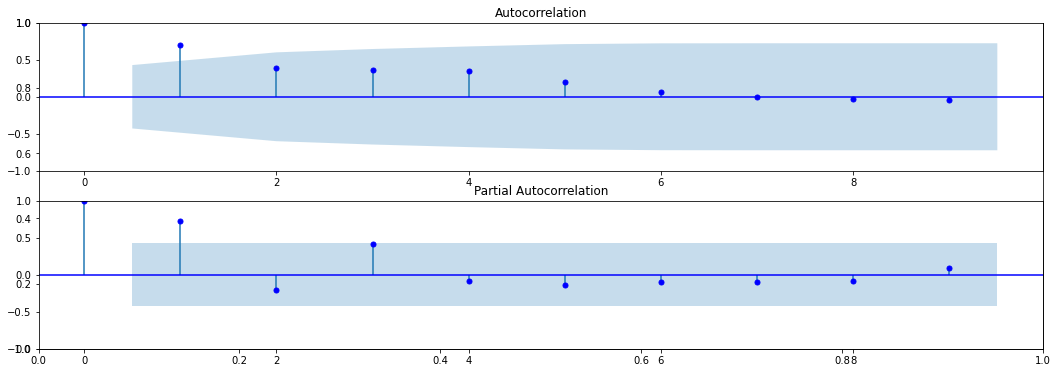

In [62]:
df3=df_covid_aux.T.copy()
fig, ax = plt.subplots(figsize=(18,6))
ax = fig.add_subplot(211)
fig = plot_acf(df3.iloc[1].dropna(), color = "blue", lags=9, ax=ax)
ax = fig.add_subplot(212)
fig = plot_pacf(df3.iloc[1].dropna(), color = "blue", lags=9, ax=ax)

As we mentioned above, these plots help us choose values for the three variables needed for the ARIMA modelling, namely the number of autoregressive terms (p), the number of nonseasonal differences needed for stationarity (d) and the number of lagged forecast errors in the prediction equation (q).

**p:** we choose p = 1 due to the single significant spike at lag 1 in the PACF plot

**d:** to deduce \(d\) we have to examine the p-value, which will be given by the adf test conducted below

**q:** we choose q = 1 since the ACF plot indicates that there is a significant correlation at lag 1

Now, we'll conduct the Augmented Dickey-Fuller test to determine whether the time series is stationary. In our following steps, we will implement forecasting models, which assume the stationarity of our dataset. Therefore, in order to understand the trends in our data, this step is quite important, as well as our previous step of mapping out the autocorrelation and the partial one.

In [63]:
adf_test = adfuller(df_covid['Total Overdose Deaths'])

adf_result = {
    'ADF Statistic': adf_test[0],
    'p-value': adf_test[1],
    'Critical Values': adf_test[4],
}

adf_result

{'ADF Statistic': -0.5846353351231884,
 'p-value': 0.874416153508753,
 'Critical Values': {'1%': -4.137829282407408,
  '5%': -3.1549724074074077,
  '10%': -2.7144769444444443}}

This output tells us the following:

**ADF Statistic**: The calculated test statistic is -0.5846.

**p-value**: The p-value is 0.8744.

**Critical Values**: The critical value thresholds for the test statistic at the 1%, 5%, and 10% levels.

Our null hypothesis here (H0) is that the series is non-stationary. We will compare the ADF statistic value against the critical values in order to check whether we reject or fail to reject this hypothesis (#SSA). A high p-value suggests that there's a strong chance of observing the test statistic under the null hypothesis, implying we do not have enough evidence to reject the null hypothesis.

As you can obviously see, the ADF statistic is not smaller than any of the three critical values, therefore there's no reason to reject. The p-value is also much greater than the common threshold of 0.05. Therefore, the time series is likely non-stationary, meaning it exhibits trends, seasonality, or other structures that vary over time.

**d:** Now that we have the p-value, we can find the right value for d. As we've seen just above, we already found that the data is assumed to be a non-stationary time series - the plots however come from original data without previous differencing, so we start with d = 1 and we'll conduct the ADF test again after differencing the series once. Chosing d to be 1 accounts for our first step of differencing and we'll only increment it later if after this step the data is still not stationary.

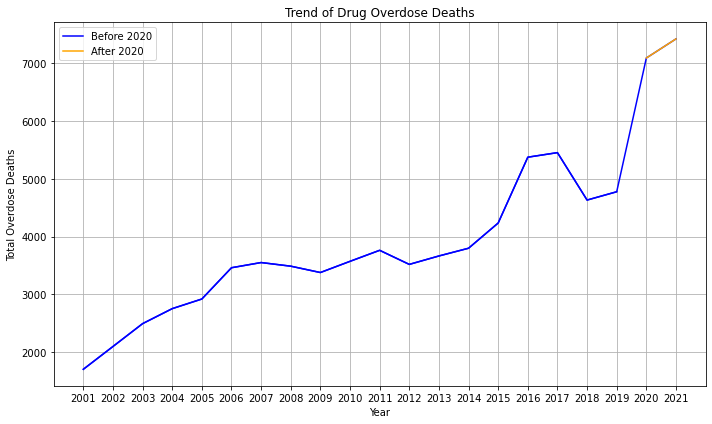

In [64]:
plt.figure(figsize=(10, 6))

plt.plot(df_covid['Year'], df_covid['Total Overdose Deaths'], color='blue')

plt.plot(df_covid[df_covid['Year'] < 2020]['Year'], df_covid[df_covid['Year'] < 2020]['Total Overdose Deaths'], color='blue', label='Before 2020')
plt.plot(df_covid[df_covid['Year'] >= 2020]['Year'], df_covid[df_covid['Year'] >= 2020]['Total Overdose Deaths'], color='orange', label='After 2020')

plt.xlabel('Year')
plt.ylabel('Total Overdose Deaths')
plt.title('Trend of Drug Overdose Deaths')
plt.grid(True)
plt.legend()
plt.xticks(range(int(min(df_covid['Year'])), int(max(df_covid['Year'])) + 1))
plt.tight_layout()
plt.show()

<font size=4>**2.1.: ARIMA Model**</font>

                                 SARIMAX Results                                 
Dep. Variable:     Total Overdose Deaths   No. Observations:                   21
Model:                    ARIMA(1, 1, 1)   Log Likelihood                -156.167
Date:                   Tue, 26 Mar 2024   AIC                            318.333
Time:                           00:52:25   BIC                            321.320
Sample:                                0   HQIC                           318.916
                                    - 21                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3066      1.259     -0.243      0.808      -2.775       2.162
ma.L1          0.7960      1.333      0.597      0.551      -1.817       3.409
sigma2      3.491e+05   7.48

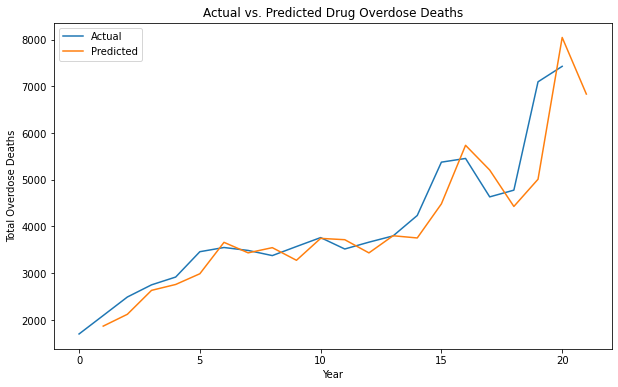

Mean Squared Error: 84874.36211620916
Forecasted values: 21    6832.981232
22    7014.779885
23    6959.046826
24    6976.132618
25    6970.894716
26    6972.500472
27    6972.008204
28    6972.159116
29    6972.112852
30    6972.127035
31    6972.122687
32    6972.124019
33    6972.123611
34    6972.123736
35    6972.123698
36    6972.123710
37    6972.123706
38    6972.123707
39    6972.123707
40    6972.123707
Name: predicted_mean, dtype: float64


In [65]:
p = 1 # AutoRegressive (AR) order
d = 1 # Integrated (I) order
q = 1 # Moving Average (MA) order

df_time_series = df_covid['Total Overdose Deaths']

arima_model = ARIMA(df_time_series, order=(p, d, q))
arima_result = arima_model.fit()

print(arima_result.summary())

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(df_time_series, label='Actual')
plt.plot(arima_result.predict(start=1, end=len(df_time_series)), label='Predicted')
plt.xlabel('Year')
plt.ylabel('Total Overdose Deaths')
plt.title('Actual vs. Predicted Drug Overdose Deaths')
plt.legend()
plt.show()

mse = mean_squared_error(df_time_series, arima_result.predict(start=1, end=len(df_time_series)))
print('Mean Squared Error:', mse)

# Forecast future values
forecast_steps = 20
forecast = arima_result.forecast(steps=forecast_steps)
print('Forecasted values:', forecast)

**ARIMA results analysis**
The length of our time series is 21, counted by the year observations. The log-likelihood, which in our case is -156.167, measures the fit of the model to the data and the Akaike Information Criterion (AIC), Bayesian Information Criterion (BIC), and Hannan-Quinn Information Criterion (HQIC) are all metrics used for model selection, rewqarding goodness of fit and penalising overfitting. These can be used if in the future we want to compare this model to another one and pick which one is better.

**Ljung-Box** the p-value is 0.36, which suggests a good model fit in terms of autocorrelation because there's no significant one at lag 1

**Jarque-Bera** the p-value here indicates the distribution followed by the residuals. In the beginning, this is 0, which is not optimal since we want the residuals to follow a normal distribution, assumed for accurate forecasting methods. However, we've already established that the series is non-stationary, so the residuals not following a normal distribution is consequence of that. That's why we'll run the summary of ADF again after the first step of differencing, to see if this stabilises. The **skewness** goes hand-in-hand with this, and implies that there is a longer tail on the right side of the distribution.

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

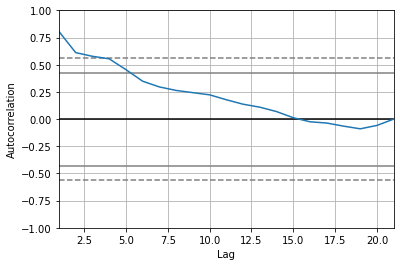

In [66]:
autocorrelation_plot(df_covid_aux)

**First Differencing**

In this section, we will focus on differencing the series once. We will re-apply the ADF test to see whether the initial errors are fixed, as in whether the Jarque-Bera p-value is larger than the threshold (commonly 0.05) to and the skewness is closer to 0, which implies the wanted normal distribution. We can observe that this happens since:

**p-value** = 0.91

**skewness** = 0.10 which is still not optimal but much much better than 1.74 and fairly symmetric

In conclusion, we achieved stabilising the data. 

Based on the ADF test results:

**p-value** = 0.00381, which is less than 0.05

**ADF Test Statistic** = -3.722 

**Critical values**

1%: -4.223238279489106

5%: -3.189368925619835

10%: -2.729839421487603

The ADF test statistic is not smaller than the critical value at significance level 1%, but it is smaller at the others. This, alonside the p-value, indicates strong evidence against the null hypothesis, suggesting that the series is stationary with 95% confidence (at 5% significance level).

Both of these will help us make proper analysis futher on.

In [67]:
# Differencing the series once to make it stationary
df_covid_aux['Differenced'] = df_covid_aux['Total Overdose Deaths'].diff().dropna()

# Check stationarity again after differencing
adf_test_diff = adfuller(df_covid_aux['Differenced'].dropna())

adf_result_diff = {
    'ADF Statistic': adf_test_diff[0],
    'p-value': adf_test_diff[1],
    'Critical Values': adf_test_diff[4],
}

print(adf_result_diff)

model = ARIMA(df_covid_aux[df_covid_aux['Year'] < 2020]['Total Overdose Deaths'], order=(1, 1, 1))
arima_result_2 = model.fit()

print(arima_result_2.summary())



{'ADF Statistic': -3.7220655435952072, 'p-value': 0.003813273093903695, 'Critical Values': {'1%': -4.223238279489106, '5%': -3.189368925619835, '10%': -2.729839421487603}}
                                 SARIMAX Results                                 
Dep. Variable:     Total Overdose Deaths   No. Observations:                   19
Model:                    ARIMA(1, 1, 1)   Log Likelihood                -130.729
Date:                   Tue, 26 Mar 2024   AIC                            267.458
Time:                           00:52:25   BIC                            270.129
Sample:                                0   HQIC                           267.826
                                    - 19                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         

c:\Users\mirun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\mirun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


**Forecasting**

We will fit ARIMA model on the data up to 2019 (before COVID-19). Based on this data, we will try to forecast the total deaths due to overdose for the yars after 2020, inclusive. Then, we will use the actual data for these years in order to see how our prediction model works and whether its results are similar to reality. 

In [68]:
forecast_years = df_covid_aux[df_covid_aux['Year'] >= 2020]['Year']
forecast = arima_result_2.get_forecast(steps=len(forecast_years))
forecast_values = forecast.summary_frame()['mean']

df_forecast = pd.DataFrame({
    'Year': forecast_years,
    'Forecasted Overdose Deaths': forecast_values.values,
    'Actual Overdose Deaths': df_covid_aux[df_covid_aux['Year'] >= 2020]['Total Overdose Deaths'].values
})

df_forecast['Residuals'] = df_forecast['Actual Overdose Deaths'] - df_forecast['Forecasted Overdose Deaths']

print(adf_test_diff)
print(df_forecast)

(-3.7220655435952072, 0.003813273093903695, 8, 11, {'1%': -4.223238279489106, '5%': -3.189368925619835, '10%': -2.729839421487603}, 143.56131011118356)
    Year  Forecasted Overdose Deaths  Actual Overdose Deaths    Residuals
19  2020                 5082.310035                  7095.0  2012.689965
20  2021                 5018.477150                  7426.0  2407.522850


**Visualisations**

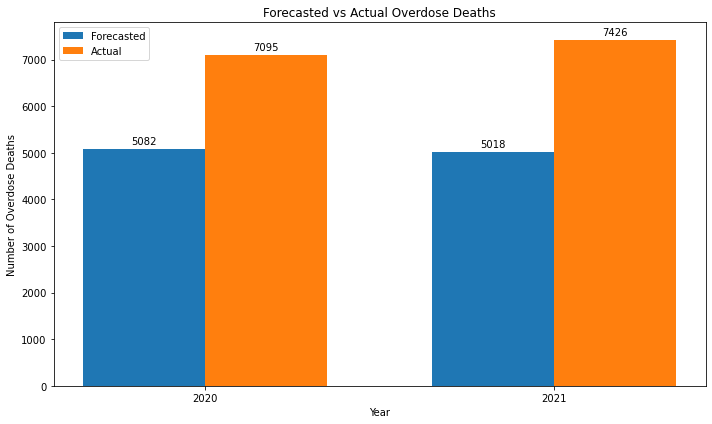

In [69]:
bar_width = 0.35
index = np.arange(len(df_forecast['Year']))

fig, ax = plt.subplots(figsize=(10, 6))
forecasted_bars = ax.bar(index, df_forecast['Forecasted Overdose Deaths'], bar_width, label='Forecasted')
actual_bars = ax.bar(index + bar_width, df_forecast['Actual Overdose Deaths'], bar_width, label='Actual')

ax.set_xlabel('Year')
ax.set_ylabel('Number of Overdose Deaths')
ax.set_title('Forecasted vs Actual Overdose Deaths')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(df_forecast['Year'])
ax.legend()

for bar in forecasted_bars + actual_bars:
    height = bar.get_height()
    ax.annotate('{}'.format(int(height)),
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), 
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()
plt.show()

Based on this data, we can clearly see that the model underestimated the number of deaths. If the trend had stayed constant, the residuals would have been a much lower number. The correlation between the pandemic's onset and an unexpected surge in overdose fatalities cannot be overlooked. This helps us answer one of our research questions, which is centered around the impact of the lockdown on the number of drug overdose deaths, namely the fact that it influenced a spike in usage due to the terrifying context. This issue not only persisted but actually caught even more magnitude, which can be observed as the difference between forecasted and real data is even larger in 2021 than in 2020 (approx. 2408 compared to 2013).

<font size=4>**2.2.: Logistic Regression**</font>

In this section, we want to use a classification model to predict whether a year is a high or low risk of overdose deaths. For this we chose Logistic Regression, as it is most commonly used for binary classifications such as this (High/ Low Risk). These categories are bounded by the median of "Total Overdose Deaths". The dataset is split and 20% is reserved for training the model. After it trains, it makes predictions and we can see its accuracy using the Confusion Matrix. 

Our model performed really well, given that the confusion matrix shows perfect classification with 3 low-risk and 2 high-risk observations correctly classified and a lack of any False Positives or Negatives. The classification report indicates that both precision and recall are 1.00 for both classes, leading to an F1-score of 1.00 across the board. This means the model accurately identified all test cases.

However, the test set is quite low, but we're confident it would perform well even on larger sets. The model's performance is partly due to the clear trend in overdose deaths over the years, with more recent years being more likely classified as high-risk.

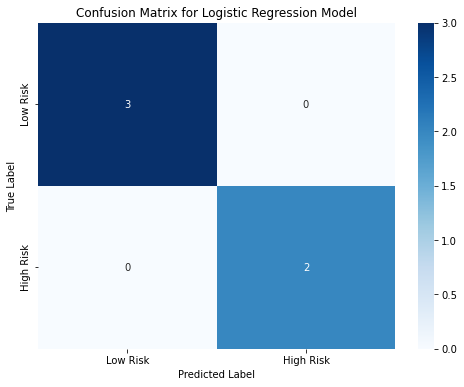

In [70]:
median_threshold = df_covid['Total Overdose Deaths'].median()

df_covid['Risk_Classification'] = (df_covid['Total Overdose Deaths'] > median_threshold).astype(int)

X = df_covid[['Year']]  # predictor
y = df_covid['Risk_Classification']  # response

# splitting the dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', 
            xticklabels=['Low Risk', 'High Risk'], 
            yticklabels=['Low Risk', 'High Risk'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Logistic Regression Model')
plt.show()

<font size=4>**2.3.: Clustering**</font>

In this section of our project, we will mainly focus on the Demographic file provided in our Dataset - namely ethnicity, gender and age. The specific excel sheet is read and then we filter the columns that we need. Since this table uses a lot of headers and subheaders, it's a bit confusing for pandas, so we had to elaborately separate everything to ensure data validation. 

It's important to mention that this dataset uses the rate of deaths which is scaled by 100.000

In order to cluster the data using demographical factors, we'll only focus on Total Deaths and not specific drug categories (thus we stop segmenting the datafarme before the Any Opiod header). We filter the data and convert to numeric format when needed.

In [71]:
df_demographic = pd.read_excel("Count_by_demo.xlsx")
end_index = df_demographic[df_demographic['Year'].str.contains("Any Opioid", na=False)].index.min()

df_demographic_filtered = df_demographic.loc[:end_index-1].copy()

positions_to_drop = range(9, 15)  # drop rows 9, 10, 11, 12, 13, and 14
df_dropped = df_demographic_filtered.drop(df_demographic_filtered.iloc[positions_to_drop].index).reset_index(drop=True)

df_demographic_long_filtered = pd.melt(df_dropped, id_vars=['Year'], var_name='Year_Num', value_name='Death_Count')
df_demographic_long_filtered = df_demographic_long_filtered[df_demographic_long_filtered['Year_Num'].apply(lambda x: str(x).isnumeric())].copy()
df_demographic_long_filtered['Year_Num'] = df_demographic_long_filtered['Year_Num'].astype(int)

df_demographic_long_filtered['Death_Count'] = pd.to_numeric(df_demographic_long_filtered['Death_Count'], errors='coerce')
df_demographic_long_filtered.dropna(subset=['Death_Count'], inplace=True)

df_demographic_long_filtered.rename(columns={'Year': 'Demographic Characteristic', 'Year_Num': 'Year'}, inplace=True)

display(df_demographic_long_filtered)

,Demographic Characteristic,Year,Death_Count
0,Total Overdose Deaths,1999,6.1
1,Female,1999,3.9
2,Male,1999,8.2
3,White (Non-Hispanic),1999,6.2
4,Female,1999,4.3
...,...,...,...
340,Female,2021,9.4
341,Male,2021,32.4
342,American Indian or Alaska Native (Non-Hispanic),2021,56.5
343,Female,2021,44.1


As can be noticed, every row which has an index = multiplier of 3 is a header and Female/ Male are its subsequent categories. That's why we chose to drop the rows with said indexes and concatenate the following two with the input in the dropped rows, so everything is nice and clean (e.g. row 4 will become White (Non-Hispanic) Female). For this, we will store the input of those Demographic entries separately. 

We will be focusing on 3 different classifications: **gender and ethnicity combined**, **only ethnicity** and **only gender**. Since we want these specific groups, we will also drop the "Total" entries.

In [72]:
df_ethnicity = df_demographic_long_filtered.loc[df_demographic_long_filtered.index % 3 == 0].reset_index(drop=True)
display(df_ethnicity)

,Demographic Characteristic,Year,Death_Count
0,Total Overdose Deaths,1999,6.1
1,White (Non-Hispanic),1999,6.2
2,Black (Non-Hispanic),1999,7.5
3,Hispanic,1999,5.4
4,American Indian or Alaska Native (Non-Hispanic),1999,6.0
...,...,...,...
110,Total Overdose Deaths,2021,32.4
111,White (Non-Hispanic),2021,36.8
112,Black (Non-Hispanic),2021,44.2
113,Hispanic,2021,21.1


In [73]:
ethnicity_df_cleaned = df_ethnicity[~df_ethnicity['Demographic Characteristic'].str.contains('total', case=False)].reset_index(drop=True)

# Display the first few rows of the cleaned dataframe
display(ethnicity_df_cleaned)

,Demographic Characteristic,Year,Death_Count
0,White (Non-Hispanic),1999,6.2
1,Black (Non-Hispanic),1999,7.5
2,Hispanic,1999,5.4
3,American Indian or Alaska Native (Non-Hispanic),1999,6.0
4,White (Non-Hispanic),2000,6.6
...,...,...,...
87,American Indian or Alaska Native (Non-Hispanic),2020,42.5
88,White (Non-Hispanic),2021,36.8
89,Black (Non-Hispanic),2021,44.2
90,Hispanic,2021,21.1


In [74]:
values_at_multiples_of_three = [] 

for index in df_demographic_long_filtered.index:
    if index % 3 == 0:
        values_at_multiples_of_three.append(df_demographic_long_filtered.loc[index, 'Demographic Characteristic'])
        
cleaned_values_at_multiples_of_three = [re.sub(r'\xa0', ' ', value).strip() for value in values_at_multiples_of_three]
print(cleaned_values_at_multiples_of_three)

['Total Overdose Deaths', 'White (Non-Hispanic)', 'Black (Non-Hispanic)', 'Hispanic', 'American Indian or Alaska Native (Non-Hispanic)', 'Total Overdose Deaths', 'White (Non-Hispanic)', 'Black (Non-Hispanic)', 'Hispanic', 'American Indian or Alaska Native (Non-Hispanic)', 'Total Overdose Deaths', 'White (Non-Hispanic)', 'Black (Non-Hispanic)', 'Hispanic', 'American Indian or Alaska Native (Non-Hispanic)', 'Total Overdose Deaths', 'White (Non-Hispanic)', 'Black (Non-Hispanic)', 'Hispanic', 'American Indian or Alaska Native (Non-Hispanic)', 'Total Overdose Deaths', 'White (Non-Hispanic)', 'Black (Non-Hispanic)', 'Hispanic', 'American Indian or Alaska Native (Non-Hispanic)', 'Total Overdose Deaths', 'White (Non-Hispanic)', 'Black (Non-Hispanic)', 'Hispanic', 'American Indian or Alaska Native (Non-Hispanic)', 'Total Overdose Deaths', 'White (Non-Hispanic)', 'Black (Non-Hispanic)', 'Hispanic', 'American Indian or Alaska Native (Non-Hispanic)', 'Total Overdose Deaths', 'White (Non-Hispanic)'

In [75]:
# Aggregate ethnicity and gender
pointer_list = 0
for index in df_demographic_long_filtered.index:
    if index % 3 == 1:  # Rows 1, 4, 7, etc.
        df_demographic_long_filtered.at[index, 'Demographic Characteristic'] = cleaned_values_at_multiples_of_three[pointer_list] + ' ' + df_demographic_long_filtered.at[index, 'Demographic Characteristic']
    elif index % 3 == 2:  # Rows 2, 5, 8, etc.
        df_demographic_long_filtered.at[index, 'Demographic Characteristic'] = cleaned_values_at_multiples_of_three[pointer_list] + ' ' + df_demographic_long_filtered.at[index, 'Demographic Characteristic']
        pointer_list += 1
    if pointer_list >= len(cleaned_values_at_multiples_of_three):
        break  # Exit the loop if there are no more characteristics to append.

df_demographic_long_filtered = df_demographic_long_filtered[df_demographic_long_filtered.index % 3 != 0].reset_index(drop=True)

# Display the first few rows to verify
display(df_demographic_long_filtered)

,Demographic Characteristic,Year,Death_Count
0,Total Overdose Deaths Female,1999,3.9
1,Total Overdose Deaths Male,1999,8.2
2,White (Non-Hispanic) Female,1999,4.3
3,White (Non-Hispanic) Male,1999,8.0
4,Black (Non-Hispanic) Female,1999,4.0
...,...,...,...
225,Black (Non-Hispanic) Male,2021,67.3
226,Hispanic Female,2021,9.4
227,Hispanic Male,2021,32.4
228,American Indian or Alaska Native (Non-Hispanic...,2021,44.1


In [76]:
# gender + eth dataframe
gender_df_cleaned = df_demographic_long_filtered[~df_demographic_long_filtered['Demographic Characteristic'].str.contains('total', case=False)].reset_index(drop=True)
display(gender_df_cleaned)

,Demographic Characteristic,Year,Death_Count
0,White (Non-Hispanic) Female,1999,4.3
1,White (Non-Hispanic) Male,1999,8.0
2,Black (Non-Hispanic) Female,1999,4.0
3,Black (Non-Hispanic) Male,1999,11.5
4,Hispanic Female,1999,2.2
...,...,...,...
179,Black (Non-Hispanic) Male,2021,67.3
180,Hispanic Female,2021,9.4
181,Hispanic Male,2021,32.4
182,American Indian or Alaska Native (Non-Hispanic...,2021,44.1


Now that we have our dataframes nicely set up, we will start by applying the elbow method to choose the value for k (we'll use k-means clustering). We first convert categorical data from the "Demographic Characteristic" column to a binary matrix so the clustering algorithm can process it. We also standardise the numerical data from the number of deaths. 

We run the K-Means clustering algorithm on the dataset for a range of values of k, from 1 to 10, and then plot the 'inertia' against the number of clusters, which is basically calculated as the sum of squared distances of samples to their closest cluster center. By visualising this, we can identify the 'elbow' aka the shifting point in the trend of the graph. 

c:\Users\mirun\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


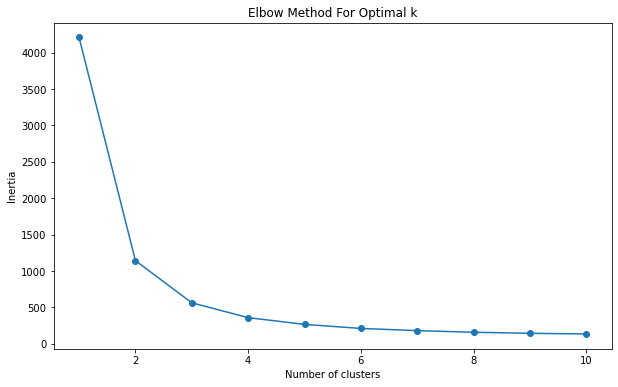

In [77]:
onehot_encoder = OneHotEncoder(sparse=False)
demographic_encoded = onehot_encoder.fit_transform(ethnicity_df_cleaned[['Demographic Characteristic']])
scaler = StandardScaler()
death_count_scaled = scaler.fit_transform(ethnicity_df_cleaned[['Death_Count']])

X_clustering = pd.concat([
    pd.DataFrame(demographic_encoded, columns=onehot_encoder.get_feature_names_out()),
    pd.DataFrame(death_count_scaled, columns=['Death_Count']),
    ethnicity_df_cleaned['Year']
], axis=1)

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_clustering)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

As can be seen from this plot, the line quickly decreases from 1 to 3 clusters and then from 4 it becomes steady. Easily enough, we'll choose k = 3 as our optimal value. 

Now we will run the K-means algorithm and cluster the data based on the amount of deaths that took place. Cluster 0 is high, Cluster 1 is intermediate and Cluster 2 is low.

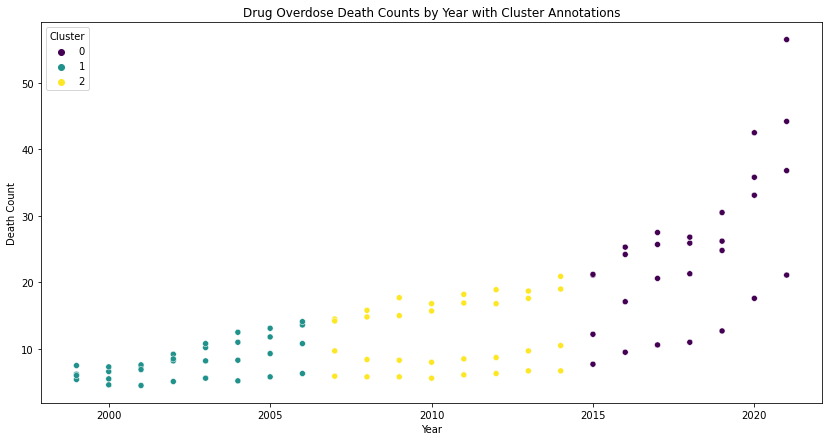

In [78]:
kmeans = KMeans(n_clusters=3, random_state=42)
ethnicity_df_cleaned['Cluster'] = kmeans.fit_predict(X_clustering)

ethnicity_df_cleaned['Cluster'] = kmeans.labels_

plt.figure(figsize=(14, 7))
sns.scatterplot(data=ethnicity_df_cleaned, x='Year', y='Death_Count', hue='Cluster', palette='viridis')
plt.title('Drug Overdose Death Counts by Year with Cluster Annotations')
plt.xlabel('Year')
plt.ylabel('Death Count')
plt.legend(title='Cluster')
plt.show()

Again, we can see that the number of death increases by year and spikes insanely after 2020.

More interestingly to our other research question, however, is the composition of our clusters, which tell us the proportion of each ethnicity in the three clusters, which may lead to some (potentially not fully accurate) conclusions about the connection beetween life background and drug usage. 

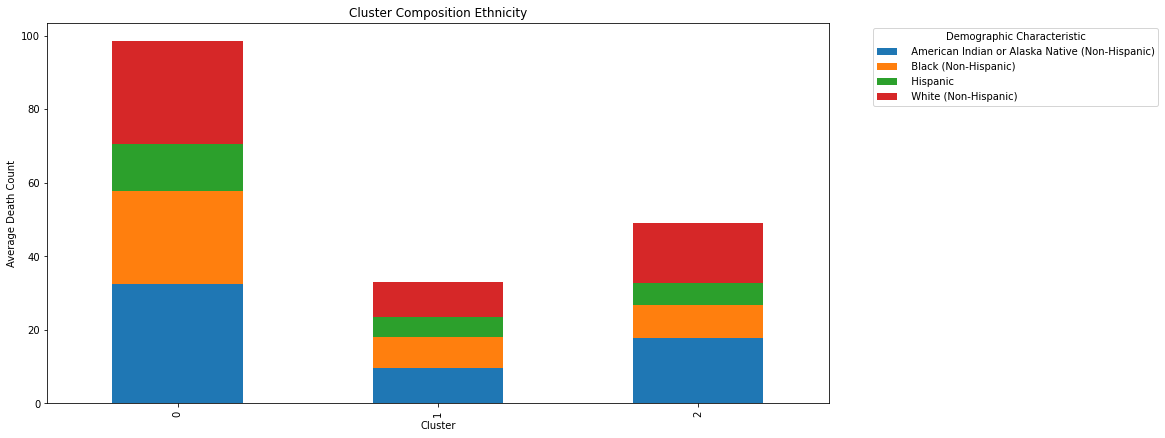

In [79]:
cluster_composition = ethnicity_df_cleaned.groupby(['Cluster', 'Demographic Characteristic'])['Death_Count'].mean().unstack(fill_value=0)
cluster_composition.plot(kind='bar', stacked=True, figsize=(14, 7))
plt.title('Cluster Composition Ethnicity')
plt.xlabel('Cluster')
plt.ylabel('Average Death Count')
plt.legend(title='Demographic Characteristic', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

For this visualisation we'll use stacked bar charts.

**Cluster 0: High Counts** Contrary some expectations, American Indian/ Alaska Native comes in first when it comes to high death counts due to OD. This is probably also because of the combined aspect of this category. They are colosely followed by People of Colour, White people and Hispanic people take the last spot. 

**Cluster 1: Medium Counts** This is quite an evenly composed cluster, however the Hispanic people still appear to have less than the other categories.

**Cluster 2: Low Counts** American Indian or Alaska Native and White is more prominent here, the distribution of People of Colour is slightly wider than that of Hispanic, but close.

Overall, we can draw the conclusion that the American Indian/ Alaska Native group shows the highest number of deaths caused by overdose, and Hispanic groups the least.


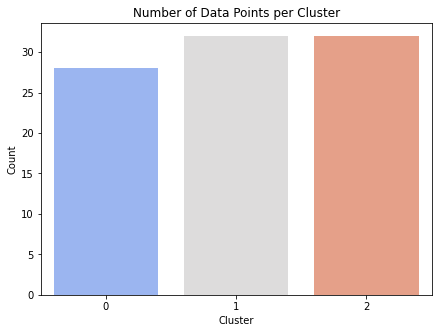

In [80]:
plt.figure(figsize=(7, 5))
sns.countplot(x='Cluster', data=ethnicity_df_cleaned, palette='coolwarm')
plt.title('Number of Data Points per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

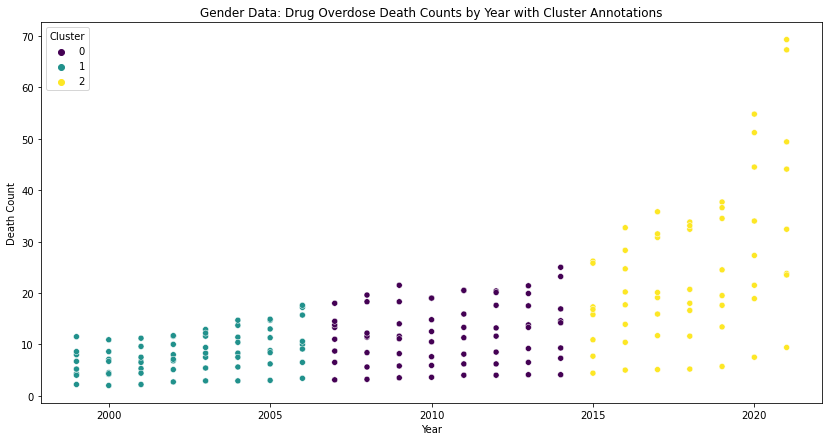

In [81]:
# this time we will one-hot encode the 'Demographic Characteristic' column with a focus on Male/Female
def extract_gender(demographics):
    return pd.Series(demographics).str.contains('Male').astype(int).replace({0: 'Female', 1: 'Male'})

gender_encoded = extract_gender(gender_df_cleaned['Demographic Characteristic'])

encoder = OneHotEncoder(sparse=False)
gender_encoded = encoder.fit_transform(gender_encoded.values.reshape(-1, 1))
death_count_scaled = scaler.fit_transform(gender_df_cleaned[['Death_Count']])

X_clustering_gender = pd.concat([
    pd.DataFrame(gender_encoded, columns=encoder.get_feature_names_out()),
    pd.DataFrame(death_count_scaled, columns=['Death_Count']),
    gender_df_cleaned['Year']  # Adding the year as a numerical feature
], axis=1)

kmeans_gender = KMeans(n_clusters=3, random_state=42)
gender_df_cleaned['Cluster'] = kmeans_gender.fit_predict(X_clustering_gender)

plt.figure(figsize=(14, 7))
sns.scatterplot(data=gender_df_cleaned, x='Year', y='Death_Count', hue='Cluster', palette='viridis')
plt.title('Gender Data: Drug Overdose Death Counts by Year with Cluster Annotations')
plt.xlabel('Year')
plt.ylabel('Death Count')
plt.legend(title='Cluster')
plt.show()

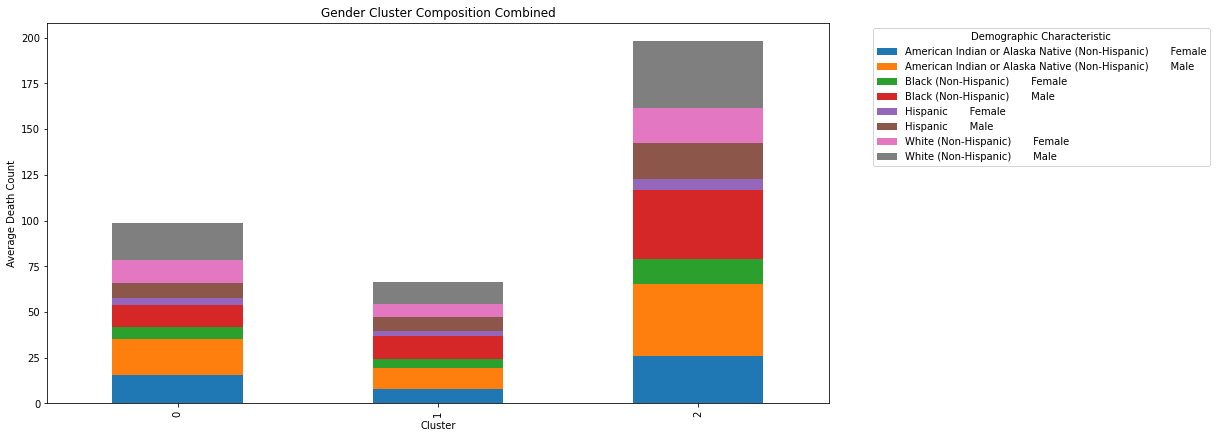

In [82]:
cluster_composition_gender = gender_df_cleaned.groupby(['Cluster', 'Demographic Characteristic'])['Death_Count'].mean().unstack(fill_value=0)
cluster_composition_gender = cluster_composition_gender.loc[:, cluster_composition_gender.columns.str.contains('Male|Female')]
cluster_composition_gender.plot(kind='bar', stacked=True, figsize=(14, 7))
plt.title('Gender Cluster Composition Combined')
plt.xlabel('Cluster')
plt.ylabel('Average Death Count')
plt.legend(title='Demographic Characteristic', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Now, we made the stacked barchart even more detailed, splitting each ethnicity group into two categories based on gender.

We can see that out of the previously deducted fact that Hispanic shows the least amount of deaths due to OD, the smallest group overall is that of Hispanic males. When it comes to White people, male have a significantly wider distribution in both high and low clusters, but similar in intermediate. For American Indian/ Alaska natives, the male category also dominates over women. It's the same for the last category.

From this we can see that generally male subjects have a higher risk of death by OD.

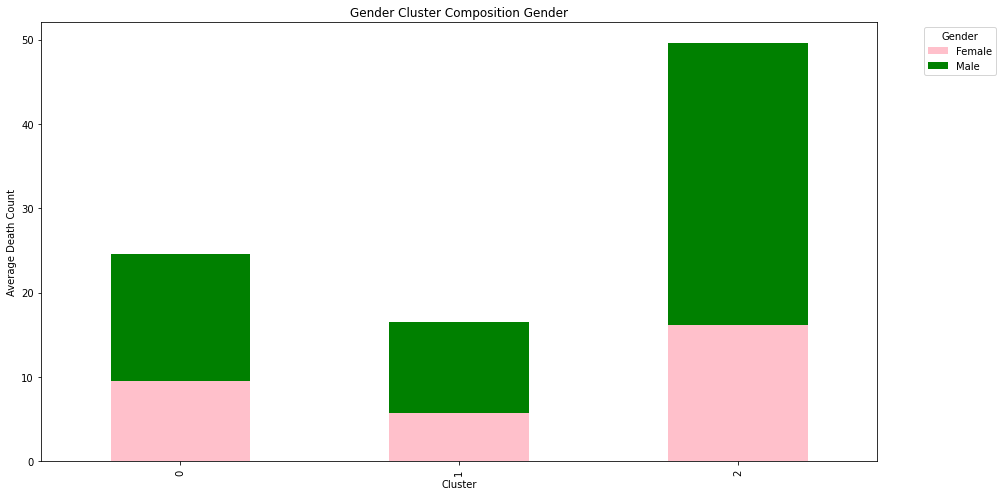

In [83]:
gender_df_cleaned['Gender'] = gender_df_cleaned['Demographic Characteristic'].apply(lambda x: 'Male' if 'Male' in x else 'Female')
cluster_composition_gender = gender_df_cleaned.groupby(['Cluster', 'Gender'])['Death_Count'].mean().unstack(fill_value=0)

cluster_composition_gender.plot(kind='bar', stacked=True, figsize=(14, 7), color={'Male': 'green', 'Female': 'pink'})
plt.title('Gender Cluster Composition Gender')
plt.xlabel('Cluster')
plt.ylabel('Average Death Count')
plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  # Adjust layout to make room for the legend
plt.show()

To verify our assumption we also classify data only by gender. As you can easily notice, male subjects take the lead.

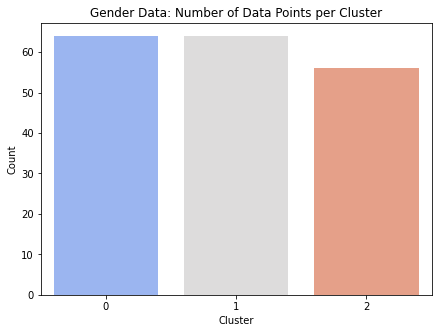

In [84]:
plt.figure(figsize=(7, 5))
sns.countplot(x='Cluster', data=gender_df_cleaned, palette='coolwarm')
plt.title('Gender Data: Number of Data Points per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

<font size=4>**2.4.: More Analysis on Demographic Factors**</font>

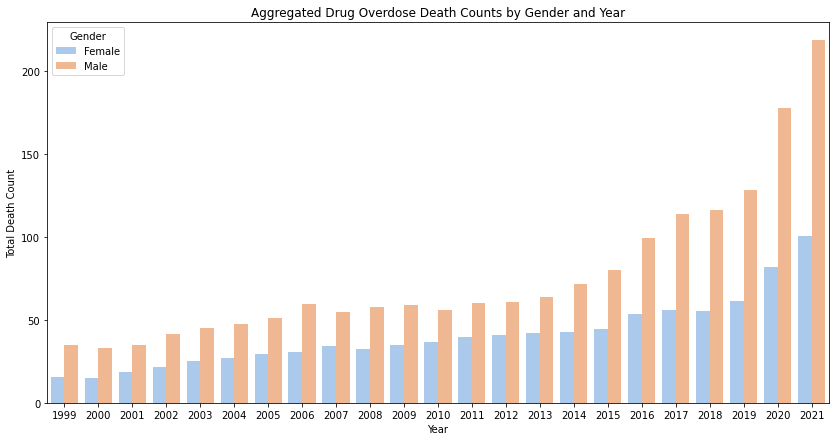

In [85]:
gender_df_cleaned['Gender'] = gender_df_cleaned['Demographic Characteristic'].apply(lambda x: 'Male' if 'Male' in x else 'Female')
gender_aggregated = gender_df_cleaned.groupby(['Year', 'Gender'])['Death_Count'].sum().reset_index()

# Now, you can plot this aggregated data
plt.figure(figsize=(14, 7))
sns.barplot(data=gender_aggregated, x='Year', y='Death_Count', hue='Gender', palette='pastel')
plt.title('Aggregated Drug Overdose Death Counts by Gender and Year')
plt.xlabel('Year')
plt.ylabel('Total Death Count')
plt.legend(title='Gender')
plt.show()


In order to validate our previous conclusion, we made a bit of an easier to read plot, showing the difference between male and female overall deaths caused by OD by aggregating our cluster entries. You can obviously notice that the number of male death is proportionally higher than that for females across all years.

In [86]:
file_path = 'Overdose1999-2021.xlsx'
xls = pd.ExcelFile(file_path)
relevant_sheets = [sheet_name for sheet_name in xls.sheet_names if "15-24" in sheet_name]
aggregated_data = pd.DataFrame()

for sheet_name in relevant_sheets:
    df = pd.read_excel(xls, sheet_name=sheet_name)
    year_columns = df.columns[1:]

    data_rows = []

    for i in range(0, len(df), 3):
        total_row = df.iloc[i]
        female_row = df.iloc[i+1]
        male_row = df.iloc[i+2]

        for year in year_columns:
            data_rows.append({
                'Drug Category': total_row[df.columns[0]],  
                'Year': year,
                'Total Deaths': total_row[year],
                'Female Deaths': female_row[year],
                'Male Deaths': male_row[year],
            })

    aggregated_data = pd.concat([aggregated_data, pd.DataFrame(data_rows)], ignore_index=True)

aggregated_data[['Total Deaths', 'Female Deaths', 'Male Deaths']] = aggregated_data[['Total Deaths', 'Female Deaths', 'Male Deaths']].apply(pd.to_numeric, errors='coerce')

yearly_totals = aggregated_data.groupby('Year')['Total Deaths'].sum().reset_index()

yearly_totals['Year'] = yearly_totals['Year'].astype(str)

For a cleaner view on things, we'll group drug categories as follows:

In [87]:
# combining all these smaller categories into more general ones based on the main type of drug (e.g. Antidepressants AND Any Opioid + 
# Antidepressants AND Synthetic Opioids other than Methadone + Antidepressants8 will all be under "Antidepressants")

# we'll use a mapping function for this
def categorize_drug_categories(category):
    if 'Antidepressants' in category:
        return 'Antidepressants'
    elif 'Benzodiazepines' in category:
        return 'Benzodiazepines'
    elif 'Cocaine' in category:
        return 'Cocaine'
    elif 'Heroin' in category:
        return 'Heroin'
    elif 'Prescription Opioids' in category or 'Any Opioid' in category:
        return 'Opioids'
    elif 'Psychostimulants' in category or 'Stimulants' in category:
        return 'Stimulants'
    elif 'Synthetic Opioids' in category:
        return 'Synthetic Opioids'
    else:
        return 'Other Drugs'


aggregated_data['Main Drug Category'] = aggregated_data['Drug Category'].apply(categorize_drug_categories)
aggregated_data_grouped = aggregated_data.groupby(['Year', 'Main Drug Category'])['Total Deaths', 'Female Deaths', 'Male Deaths'].sum().reset_index()

display(aggregated_data_grouped)

C:\Users\mirun\AppData\Local\Temp\ipykernel_12364\1807935660.py:25: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  aggregated_data_grouped = aggregated_data.groupby(['Year', 'Main Drug Category'])['Total Deaths', 'Female Deaths', 'Male Deaths'].sum().reset_index()


,Year,Main Drug Category,Total Deaths,Female Deaths,Male Deaths
0,1999,Antidepressants,0.3,0.1,0.2
1,1999,Benzodiazepines,0.3,0.0,0.4
2,1999,Cocaine,1.1,0.5,1.6
3,1999,Heroin,0.5,0.2,0.8
4,1999,Opioids,2.8,1.2,3.8
...,...,...,...,...,...
187,Fold Change 2015 to 2021,Heroin,0.2,1.3,1.0
188,Fold Change 2015 to 2021,Opioids,12.2,13.7,14.8
189,Fold Change 2015 to 2021,Other Drugs,1.8,1.9,1.8
190,Fold Change 2015 to 2021,Stimulants,6.9,22.3,42.9


In [88]:
# cleaning, drop rows for 'total' and 'any opioids' so we only keep track of specific drug categories
multiples_of_three_df = df1.loc[df1.index % 3 == 0]
multiples_of_three_df2 = multiples_of_three_df.iloc[2:].reset_index(drop=True)

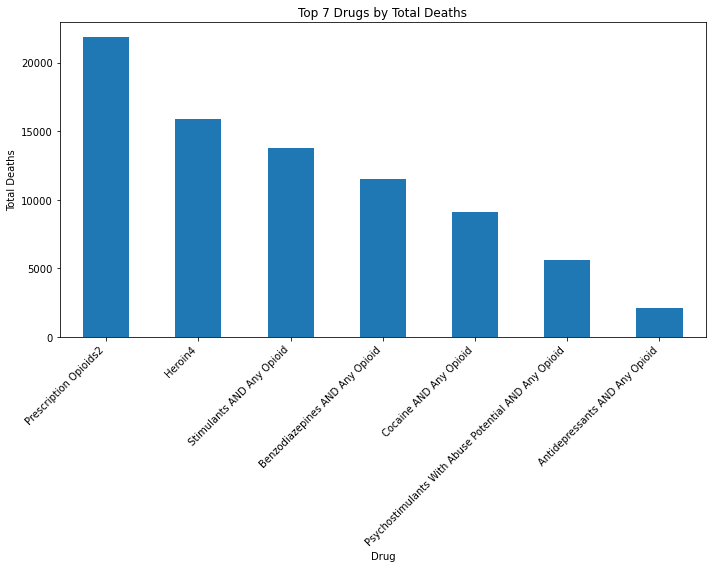

In [89]:
# top 10 by number for all ages
for col in multiples_of_three_df2.columns[1:]:  
    multiples_of_three_df2[col] = pd.to_numeric(multiples_of_three_df2[col], errors='coerce')

drugs_only = multiples_of_three_df2.iloc[::3, :]
drugs_total_deaths = drugs_only.iloc[:, 1:].sum(axis=1)
drugs_total_deaths.index = drugs_only.iloc[:, 0]  

sorted_deaths = drugs_total_deaths.sort_values(ascending=False)

plt.figure(figsize=(10, 8))
sorted_deaths.head(10).plot(kind='bar')
plt.title('Top 7 Drugs by Total Deaths')
plt.xlabel('Drug')
plt.ylabel('Total Deaths')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()


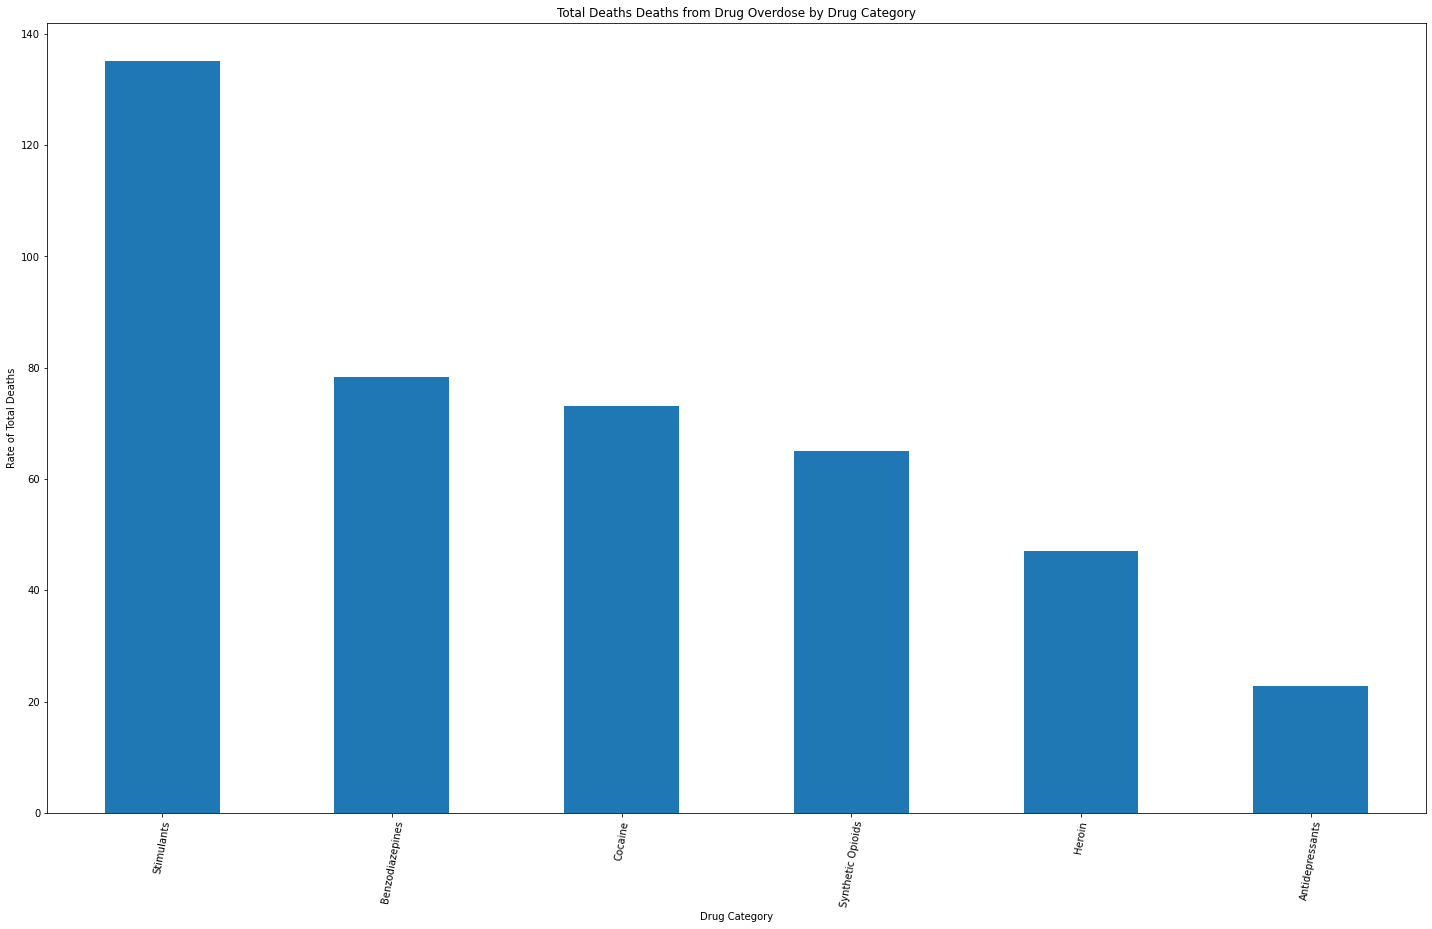

In [90]:
# top 10 by rate for ages 15-24
total_deaths_by_category = aggregated_data_grouped.groupby('Main Drug Category')['Total Deaths'].sum()


sorted = total_deaths_by_category.sort_values(ascending=False)
sorted = sorted.iloc[2:]

sorted.head(10).plot(kind='bar', figsize=(20, 13))
plt.title('Total Deaths Deaths from Drug Overdose by Drug Category')
plt.xlabel('Drug Category')
plt.ylabel('Rate of Total Deaths')
plt.tight_layout() 
plt.xticks(rotation=80)
plt.show()

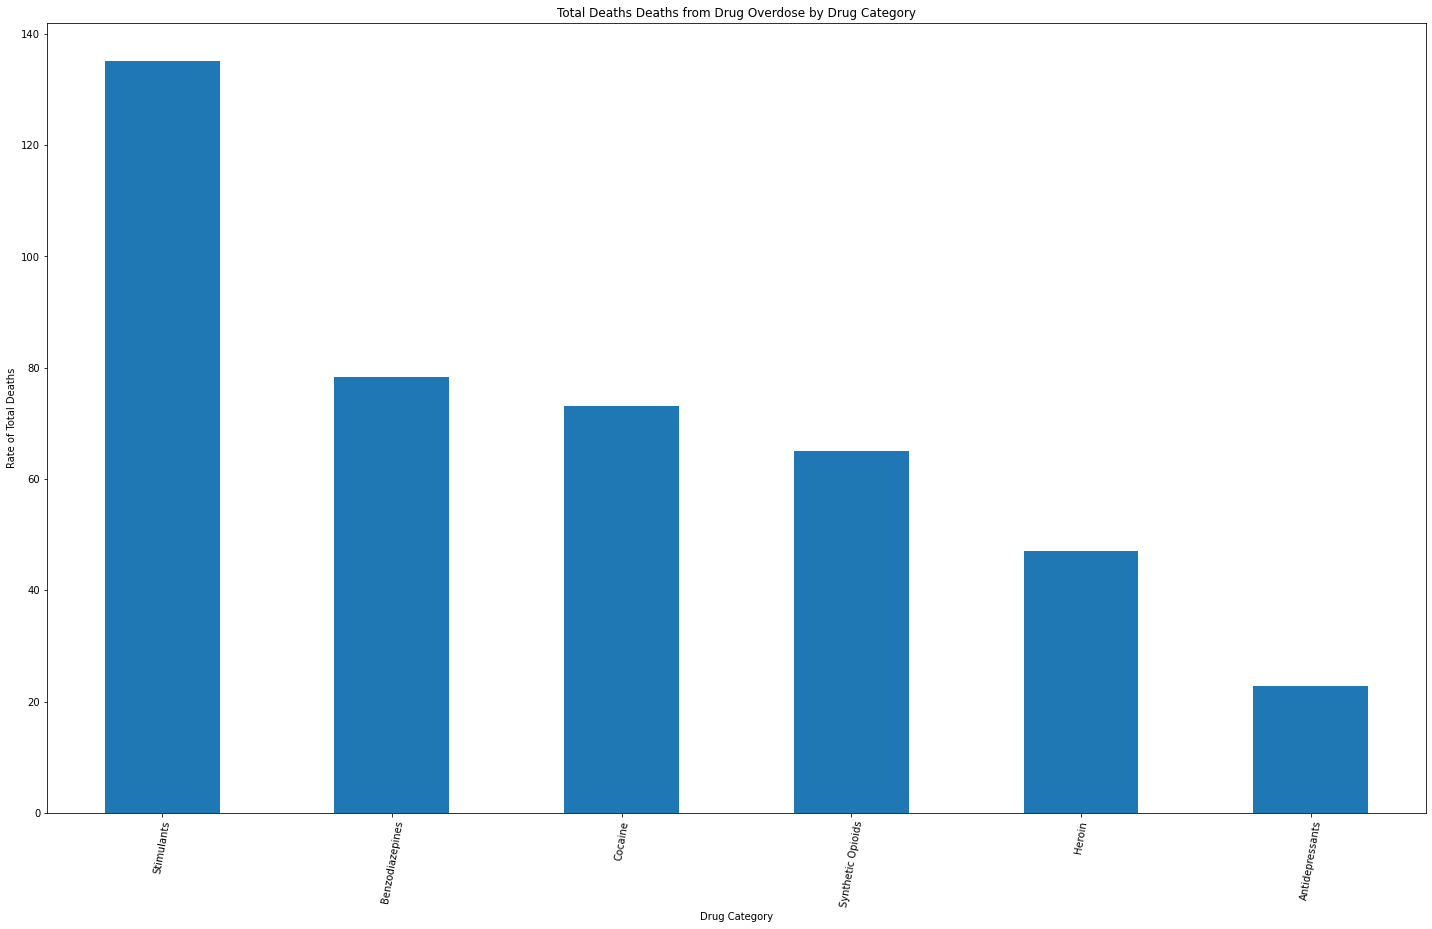

In [91]:
# top 10 by rate for ages 15-24, but on grouped drug categories
total_deaths_by_category = aggregated_data_grouped.groupby('Main Drug Category')['Total Deaths'].sum()

sorted = total_deaths_by_category.sort_values(ascending=False)
sorted = sorted.iloc[2:]

sorted.head(10).plot(kind='bar', figsize=(20, 13))
plt.title('Total Deaths Deaths from Drug Overdose by Drug Category')
plt.xlabel('Drug Category')
plt.ylabel('Rate of Total Deaths')
plt.tight_layout() 
plt.xticks(rotation=80)
plt.show()

These are the top 10 most lethal drugs according to our analysis. 
The first plot showsthe trend over all ages and the second is limited to the age group of 15-24. From the start we can notice that the order is changed, which shows that drugs such as Synthetic Opioids are more popular in the younger demographics, while Benzodiazepines are more frequently used (and lethally so) in the overall demographics, possibly in the age group over 24 since we hope no kids under 15 are doing drugs <3

Now, we'll dive deeper and analyse the difference between this overall information and the top 10 most legthal drugs for male and female separately and identify differences.

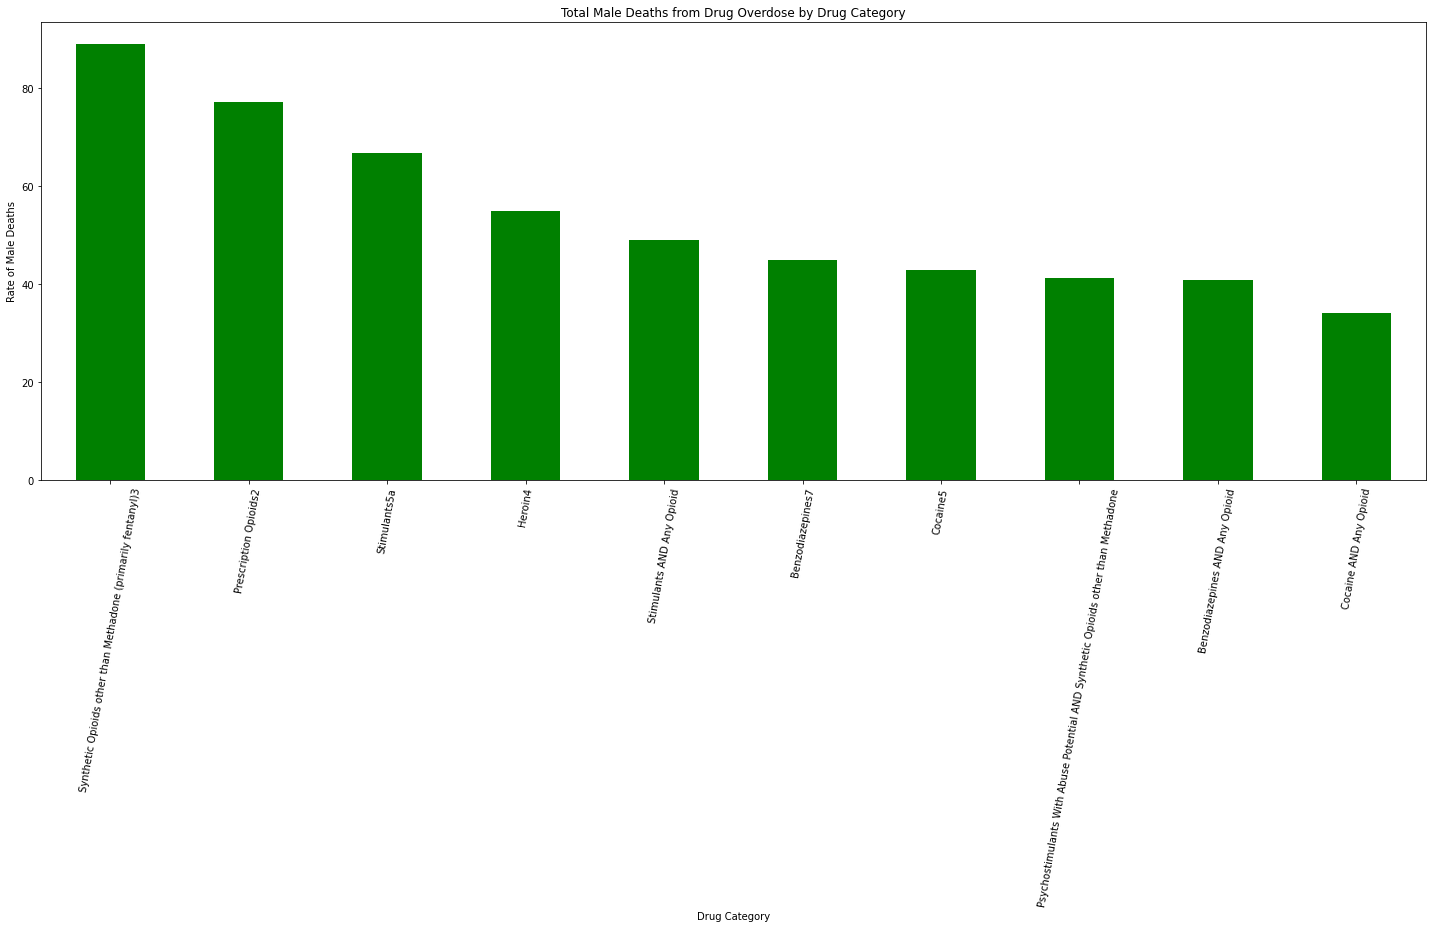

In [92]:
male_deaths_by_category = aggregated_data.groupby('Drug Category')['Male Deaths'].sum()


sorted_male_deaths = male_deaths_by_category.sort_values(ascending=False)
sorted_male_deaths = sorted_male_deaths.iloc[2:]

sorted_male_deaths.head(10).plot(kind='bar', figsize=(20, 13), color='green')
#display(sorted_female_deaths)
plt.title('Total Male Deaths from Drug Overdose by Drug Category')
plt.xlabel('Drug Category')
plt.ylabel('Rate of Male Deaths')
plt.xticks(rotation=80)
plt.tight_layout() 
plt.show()

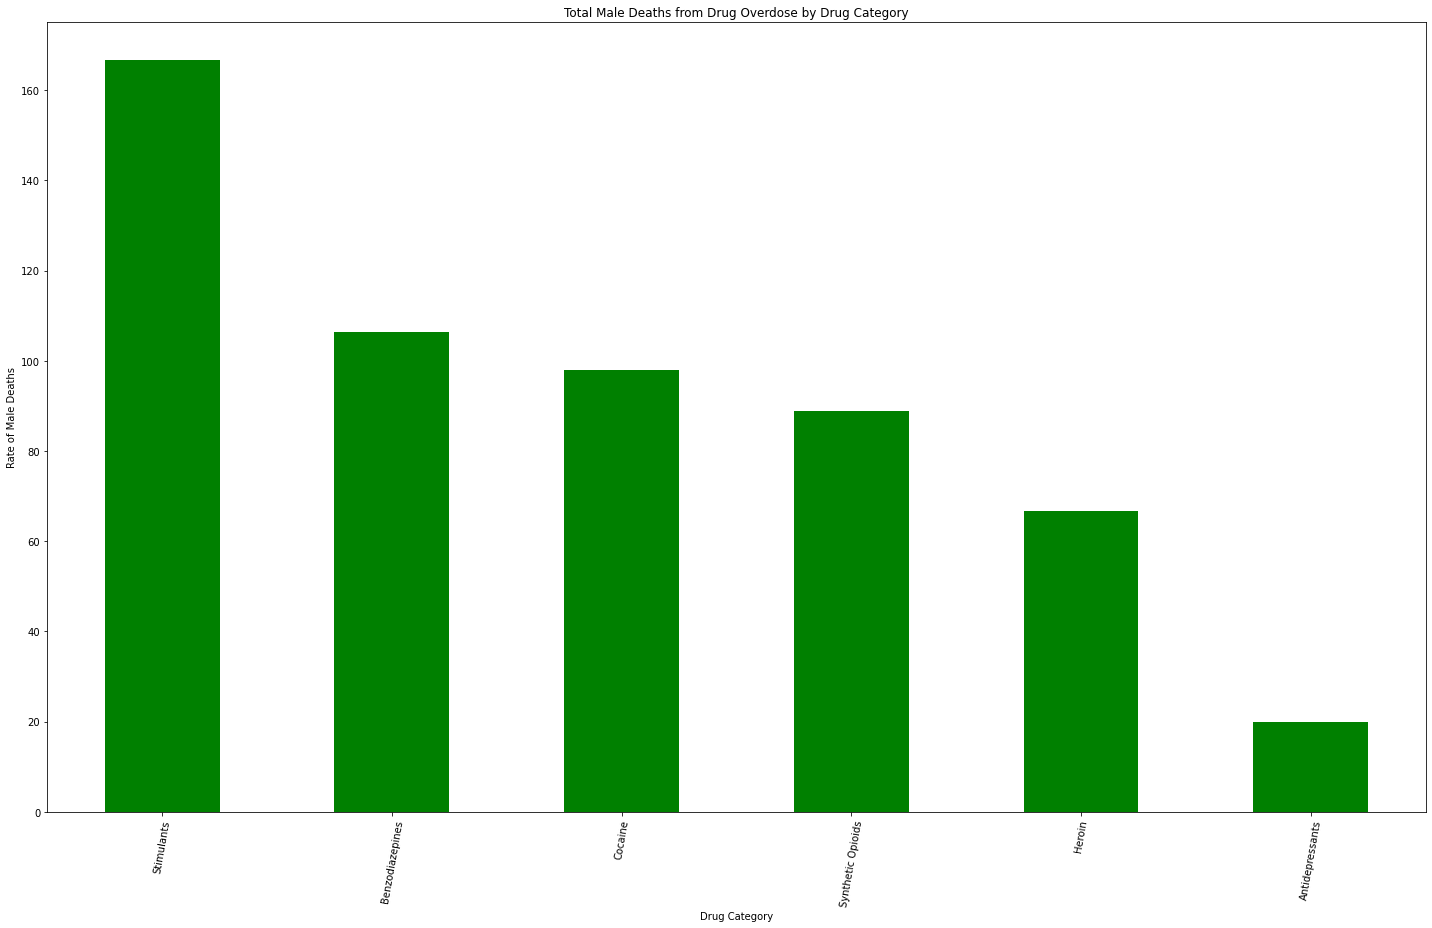

In [93]:
male_deaths_by_category_cleaned = aggregated_data_grouped.groupby('Main Drug Category')['Male Deaths'].sum()


sorted_male_deaths = male_deaths_by_category_cleaned.sort_values(ascending=False)
sorted_male_deaths = sorted_male_deaths.iloc[2:]

sorted_male_deaths.head(10).plot(kind='bar', figsize=(20, 13), color='green')
plt.title('Total Male Deaths from Drug Overdose by Drug Category')
plt.xlabel('Drug Category')
plt.ylabel('Rate of Male Deaths')
plt.xticks(rotation=80)
plt.tight_layout() 
plt.show()

For male demographics, there's a significant change in order in the latter half of the rankings, with Psychostimulants being less popular than in the overall census and Benzodiazepines being used more.

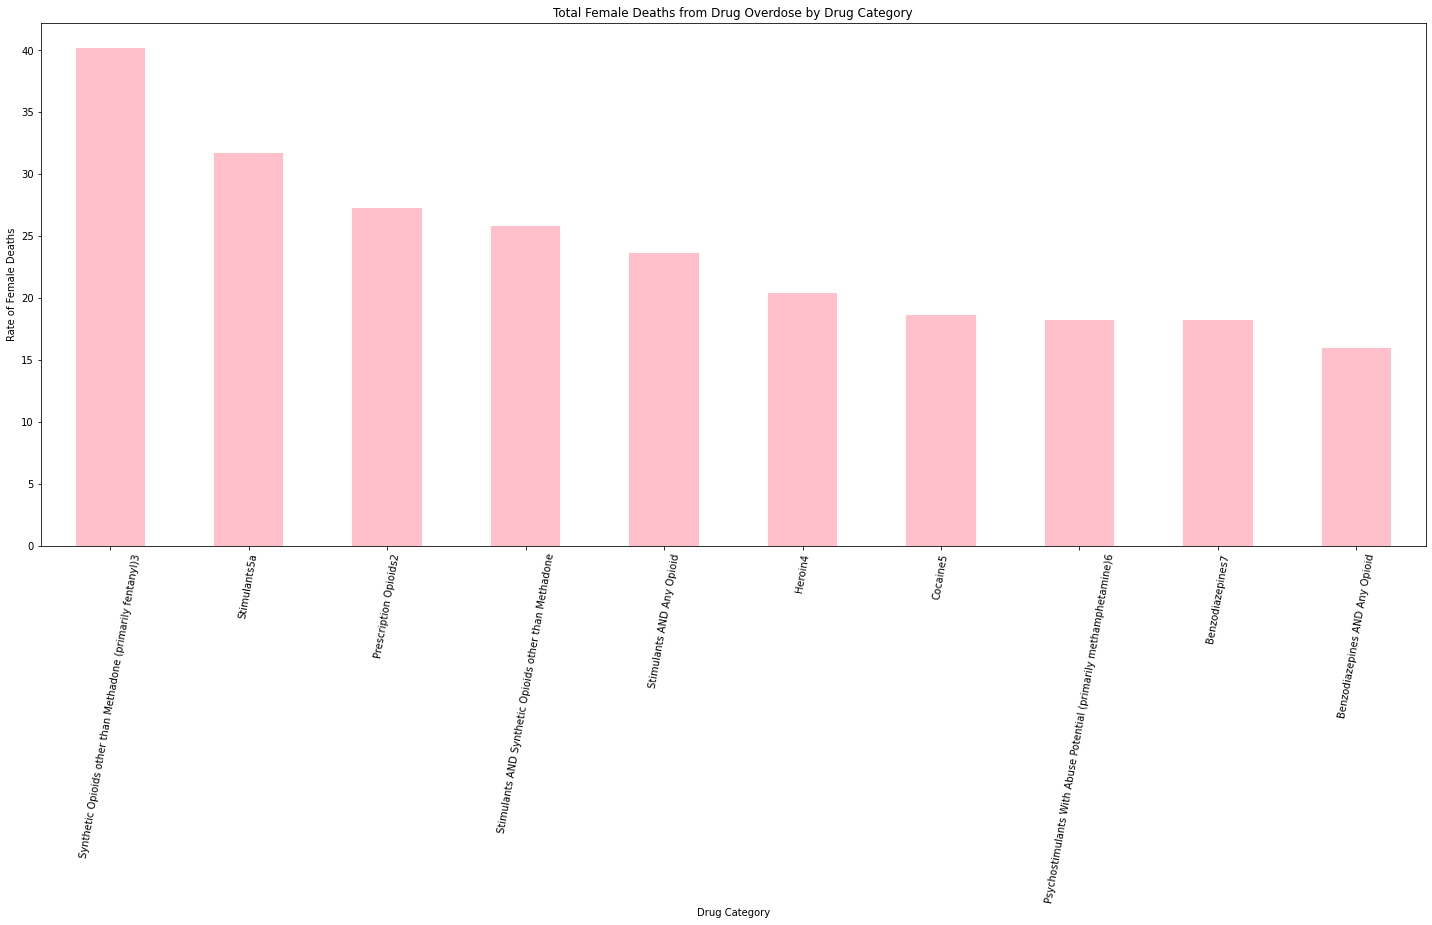

In [94]:
female_deaths_by_category = aggregated_data.groupby('Drug Category')['Female Deaths'].sum()


sorted_female_deaths = female_deaths_by_category.sort_values(ascending=False)
sorted_female_deaths = sorted_female_deaths.iloc[2:]

sorted_female_deaths.head(10).plot(kind='bar', figsize=(20, 13), color='pink')
#display(sorted_female_deaths)
plt.title('Total Female Deaths from Drug Overdose by Drug Category')
plt.xlabel('Drug Category')
plt.ylabel('Rate of Female Deaths')
plt.tight_layout() 
plt.xticks(rotation=80)
plt.show()

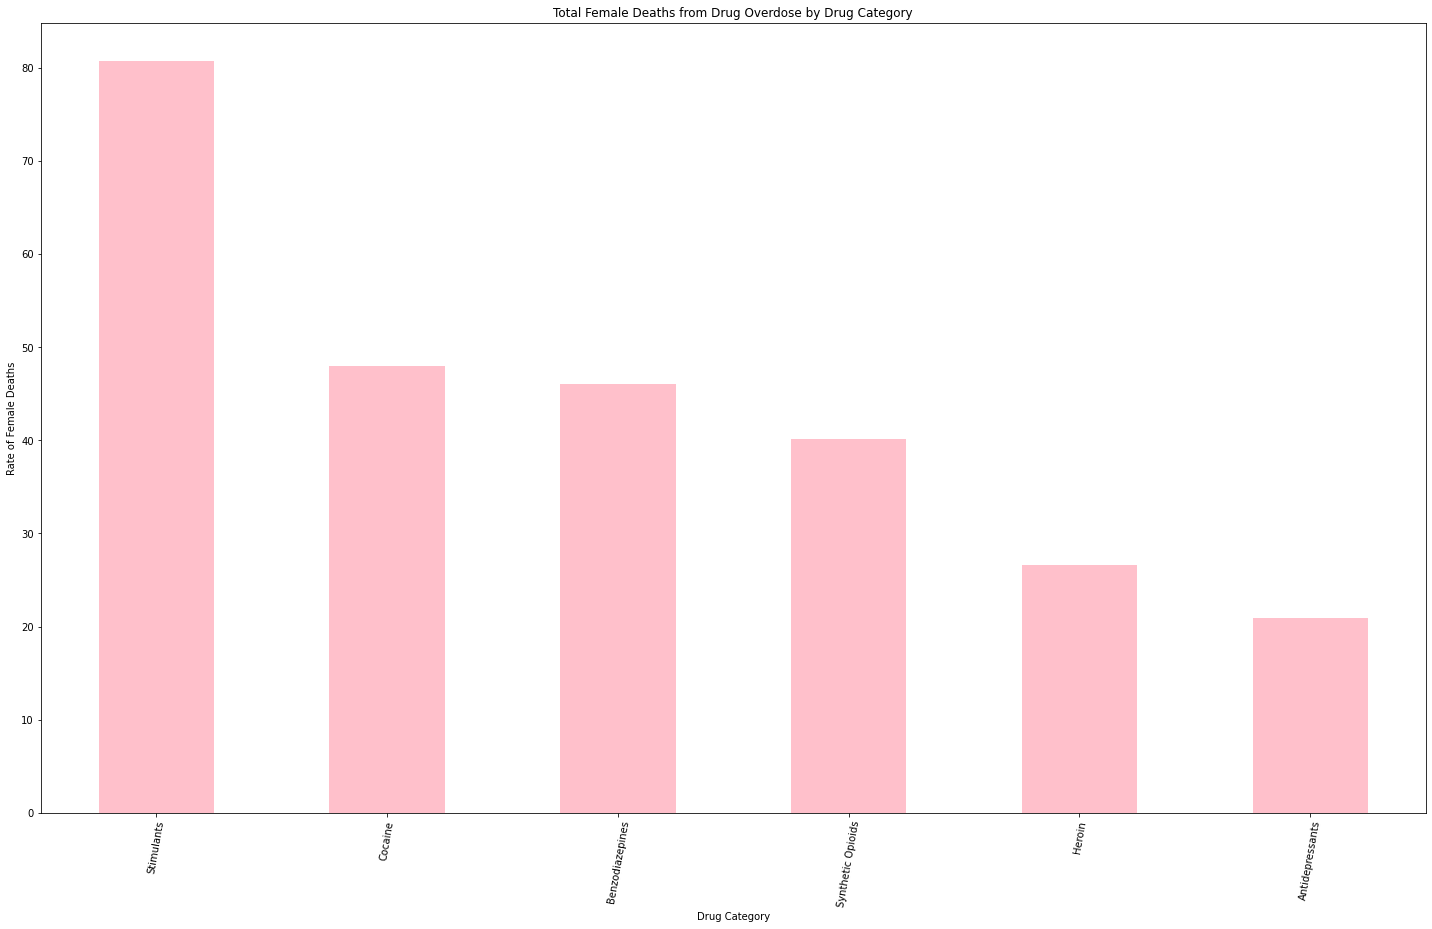

In [95]:
female_deaths_by_category_cleaned = aggregated_data_grouped.groupby('Main Drug Category')['Female Deaths'].sum()


sorted_female_deaths = female_deaths_by_category_cleaned.sort_values(ascending=False)
sorted_female_deaths = sorted_female_deaths.iloc[2:]

sorted_female_deaths.head(10).plot(kind='bar', figsize=(20, 13), color='pink')
#display(sorted_female_deaths)
plt.title('Total Female Deaths from Drug Overdose by Drug Category')
plt.xlabel('Drug Category')
plt.ylabel('Rate of Female Deaths')
plt.tight_layout() 
plt.xticks(rotation=80)
plt.show()

A significant difference between the male and female demographics is that women are way less likely to use Benzodiazepines and Heroin.
In order to factually visualise the difference in rankings for the given drug categories between male and female subjects, we will make use of the 'spearman rho' method (reference from statisticssolutions.com) which asses the strength and direction of the association between two ranked variables. 

In [96]:
rank_correlation = female_deaths_by_category.rank().corr(male_deaths_by_category.rank(), method='spearman')
ranks_female = female_deaths_by_category.rank(ascending=False)
ranks_male = male_deaths_by_category.rank(ascending=False)
rank_difference = ranks_female - ranks_male
display(rank_difference)

Drug Category
Antidepressants AND Any Opioid                                                      -1.0
Antidepressants AND Synthetic Opioids other than Methadone                           0.0
Antidepressants8                                                                    -3.0
Any Opioid1                                                                          0.0
Benzodiazepines AND Any Opioid                                                       1.0
Benzodiazepines AND Synthetic Opioids other than Methadone                          -1.0
Benzodiazepines7                                                                     2.5
Cocaine AND Any Opioid                                                               1.0
Cocaine AND Synthetic Opioids other than Methadone                                  -2.0
Cocaine5                                                                             0.0
Heroin AND Synthetic Opioids other than Methadone                                   -1.0
Heroin4

The three biggest differences are encountered in **Psychostimulants With Abuse Potential AND Synthetic Opioids other than Methadone** (11 spots higher for females), **Stimulants AND Synthetic Opioids other than Methadone** (8 higer for males) & **Antidepressants** (3 higher for males).

In [97]:
rank_correlation_1 = female_deaths_by_category_cleaned.rank().corr(male_deaths_by_category.rank(), method='spearman')
ranks_female_1 = female_deaths_by_category_cleaned.rank(ascending=False)
ranks_male_1 = male_deaths_by_category_cleaned.rank(ascending=False)
rank_difference_1 = ranks_female_1 - ranks_male_1
display(rank_difference_1)

Main Drug Category
Antidepressants      0.0
Benzodiazepines      1.0
Cocaine             -1.0
Heroin               0.0
Opioids              0.0
Other Drugs          0.0
Stimulants           0.0
Synthetic Opioids    0.0
dtype: float64

On the grouped categories, the only differences in rankings lie in **Cocaine** (1 higher for male) and **Benzodiazepines** (1 higher for female).

<font size=4>**2.5.: Descriptive Statistics**</font>

In this section we'll focus on very basic features of our dataset to fully grasp it and quantitatively asses it.

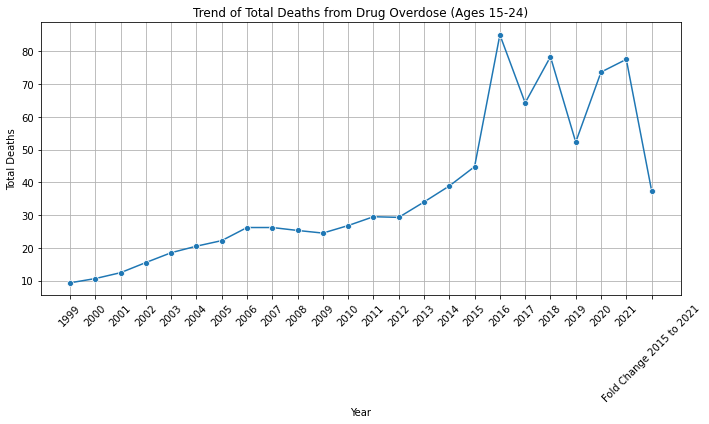

In [98]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=yearly_totals, x='Year', y='Total Deaths', marker='o')

plt.title('Trend of Total Deaths from Drug Overdose (Ages 15-24)')
plt.xlabel('Year')
plt.ylabel('Total Deaths')
plt.xticks(rotation=45) 
plt.grid(True)
plt.tight_layout() 

plt.show()

As we can see, the graph depicts a relatively steady increase in overdose deaths from 1999 to around 2010. After that point there is more variability in the data with some years seeing a decrease followed by sharp increases. Notably, there are peaks that suggest significantly higher death counts in certain years. Such a spike occurs in 2020, where the number of deaths reaches its maximum for the entire time series. This could be indicative of a particular event or change in circumstances during that year. Given the known impact of the COVID-19 pandemic, it could be related to increased drug overdose deaths during this period. Additionally, after the spike in 2020, there's a decline in the number of deaths in 2021. This could be due to various factors, such as intervention programs, changes in drug availability or usage, or other socio-economic factors.

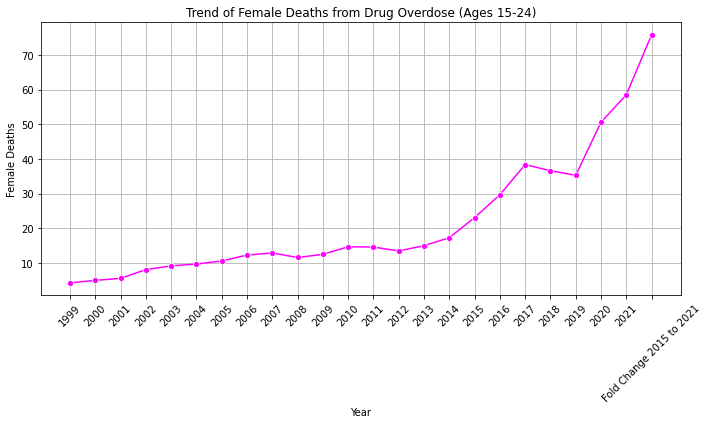

In [99]:
yearly_female_deaths = aggregated_data.groupby('Year')['Female Deaths'].sum().reset_index()

# Convert 'Year' to a string type if it's not already, to ensure it's treated as a categorical variable
yearly_female_deaths['Year'] = yearly_female_deaths['Year'].astype(str)

# Now, let's create the plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=yearly_female_deaths, x='Year', y='Female Deaths', marker='o', color='magenta')

plt.title('Trend of Female Deaths from Drug Overdose (Ages 15-24)')
plt.xlabel('Year')
plt.ylabel('Female Deaths')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.grid(True)
plt.tight_layout()  # Adjust the layout to make room for the rotated x-axis labels

# Show the plot
plt.show()

Before 2012, the trend is quite steady and holds to low numbers. After 2010, there is a more pronounced increase, indicating a rising trend in the number of deaths. Moreover, as we can see there is sharp rises in deaths in 2017 and fthen from 2019 it's constantly increasing.

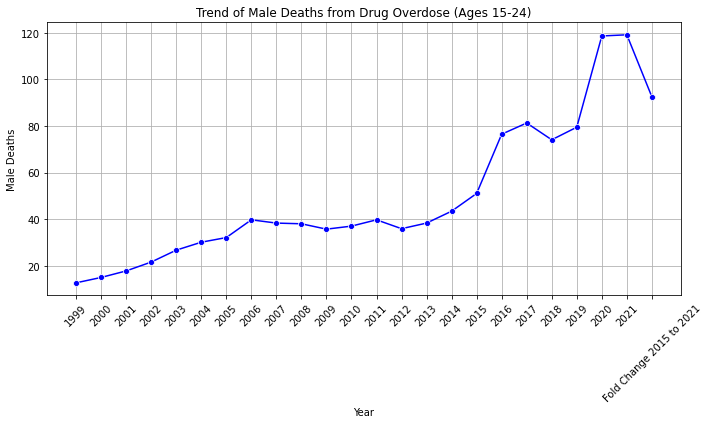

In [100]:
yearly_male_deaths = aggregated_data.groupby('Year')['Male Deaths'].sum().reset_index()

# Convert 'Year' to a string type if it's not already, to ensure it's treated as a categorical variable
yearly_male_deaths['Year'] = yearly_male_deaths['Year'].astype(str)

# Now, let's create the plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=yearly_male_deaths, x='Year', y='Male Deaths', marker='o', color='blue')

plt.title('Trend of Male Deaths from Drug Overdose (Ages 15-24)')
plt.xlabel('Year')
plt.ylabel('Male Deaths')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.grid(True)
plt.tight_layout()  # Adjust the layout to make room for the rotated x-axis labels

# Show the plot
plt.show()

Starting from 1999, there's a general increase in the number of male deaths due to drug overdos and around 2010, there is a notable increase. The most pronounced rise occures around 2014 to 2015. In 2020, the highest point on the graph is reached which further validates our theory on the impact of the COVID-19 pandemic. After the spike in 2020, there's a decrease in 2021, but the number of deaths remains high compared to the years before the spike.

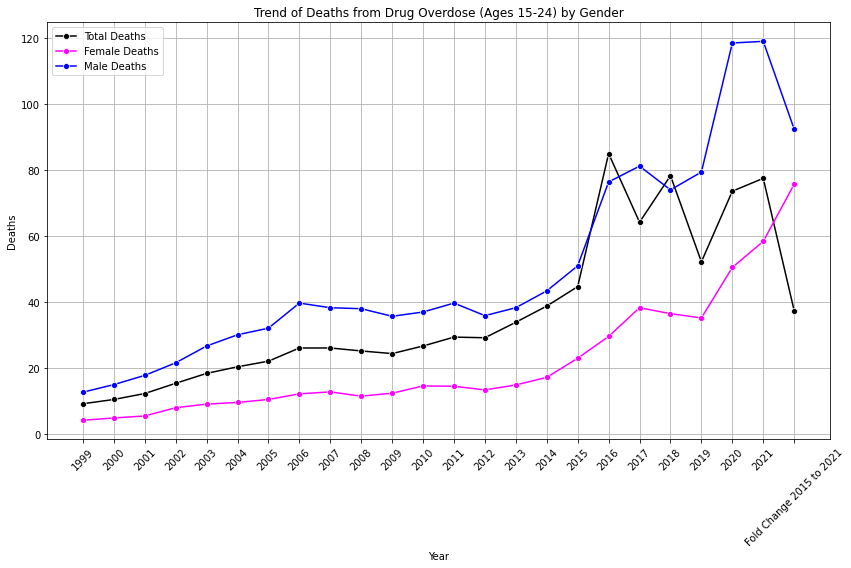

In [101]:
yearly_totals = aggregated_data.groupby('Year')['Total Deaths'].sum().reset_index()
yearly_female_deaths = aggregated_data.groupby('Year')['Female Deaths'].sum().reset_index()
yearly_male_deaths = aggregated_data.groupby('Year')['Male Deaths'].sum().reset_index()

# Convert 'Year' to string to ensure it's treated as a categorical variable
yearly_totals['Year'] = yearly_totals['Year'].astype(str)
yearly_female_deaths['Year'] = yearly_female_deaths['Year'].astype(str)
yearly_male_deaths['Year'] = yearly_male_deaths['Year'].astype(str)

# Now, let's create the plot
plt.figure(figsize=(12, 8))

# Plot total deaths
sns.lineplot(data=yearly_totals, x='Year', y='Total Deaths', marker='o', color='black', label='Total Deaths')

# Plot female deaths
sns.lineplot(data=yearly_female_deaths, x='Year', y='Female Deaths', marker='o', color='magenta', label='Female Deaths')

# Plot male deaths
sns.lineplot(data=yearly_male_deaths, x='Year', y='Male Deaths', marker='o', color='blue', label='Male Deaths')

plt.title('Trend of Deaths from Drug Overdose (Ages 15-24) by Gender')
plt.xlabel('Year')
plt.ylabel('Deaths')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.grid(True)
plt.legend()
plt.tight_layout()  # Adjust the layout to make room for the rotated x-axis labels

# Show the plot
plt.show()


It can be observed that the number of deaths by overdose increased across all categories (male, female, and total deaths) over time. Moreover, it is visible that the number of male deaths is constantly higher than the deaths in female, suggesting that males are more affected by the consume of drugs. Furthermore, according to our expectations, there is a noticeable spike in deaths, especially around 2020, for both males and females. This might correspond with external factors such as the COVID-19 pandemic

In [102]:
# Mean and Median Deaths
mean_deaths_female = female_deaths_by_category.mean()
median_deaths_female = female_deaths_by_category.median()
mean_deaths_male = male_deaths_by_category.mean()
median_deaths_male = male_deaths_by_category.median()

# Standard Deviation and Variance
std_deviation_female = female_deaths_by_category.std()
variance_female = female_deaths_by_category.var()
std_deviation_male = male_deaths_by_category.std()
variance_male = male_deaths_by_category.var()

# Print out the statistics
print("Female Mean Deaths:", mean_deaths_female, "Median Deaths:", median_deaths_female)
print("Male Mean Deaths:", mean_deaths_male, "Median Deaths:", median_deaths_male)
print("\nFemale Std Deviation:", std_deviation_female, "Variance:", variance_female)
print("Male Std Deviation:", std_deviation_male, "Variance:", variance_male)

Female Mean Deaths: 23.85909090909091 Median Deaths: 17.1
Male Mean Deaths: 54.37727272727273 Median Deaths: 37.400000000000006

Female Std Deviation: 25.756823582091037 Variance: 663.413961038961
Male Std Deviation: 66.68166687305963 Variance: 4446.444696969697


We can confidently conclude that more males are dying because of drug overdose than females based on the striking difference in the means and medians of the data.

As the standard deviation values are rather high, there is a wide distribution of deaths across different drug categories for both genders. The variation values also showcase much more dispersion in male data entries across types of drugs, so, all in all, we can say that women are not as likely to bounce around as much from one drug to another compared to men.

**P.S. Don't do drugs kids.**